<a href="https://colab.research.google.com/github/Daniel-Karlik/01NAEX/blob/main/HW/2022/01NAEX_HW2_Team_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NAEX - HW2: Matrix multiplication problem
**Authors:** Vojtěch Obhlídal, Daniel Karlík, Daniil Kirhetov

Design an experiment to measure the computation speed of manual matrix multiplication that examines the dependence on 6 factors. Assume that, due to time constraints, you are forced to use a $\frac{1}{2}$ fraction design: $2^{6-1}$ or a $\frac{1}{4}$ fraction design: $2^{6-2}$ with replications, or full factorial design with operators as blocks.

The response is the time in seconds that you measure.

Before we start, we download and install some useful packages and their dependencies.

In [1]:
cat(system('sudo apt-get install -y gmp', intern=TRUE), sep = "\n")
cat(system('sudo apt-get install -y partitions', intern=TRUE), sep = "\n")
cat(system('sudo apt-get install -y DoE.base', intern=TRUE), sep = "\n")

list_of_packages <- c("tidyverse", "car","nortest","lattice","pwr","MASS",
                      "agricolae", "FrF2")
missing_packages <- list_of_packages[!(list_of_packages %in% installed.packages()[,"Package"])]

Warning message in system("sudo apt-get install -y gmp", intern = TRUE):
“running command 'sudo apt-get install -y gmp' had status 100”


Reading package lists...
Building dependency tree...
Reading state information...


Warning message in system("sudo apt-get install -y partitions", intern = TRUE):
“running command 'sudo apt-get install -y partitions' had status 100”


Reading package lists...
Building dependency tree...
Reading state information...
Reading package lists...
Building dependency tree...
Reading state information...
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  r-cran-combinat r-cran-conf.design r-cran-gmp r-cran-lmtest r-cran-mathjaxr
  r-cran-numbers r-cran-partitions r-cran-polynom r-cran-sets r-cran-vcd
  r-cran-zoo
The following NEW packages will be installed:
  r-cran-combinat r-cran-conf.design r-cran-doe.base r-cran-gmp r-cran-lmtest
  r-cran-mathjaxr r-cran-numbers r-cran-partitions r-cran-polynom r-cran-sets
  r-cran-vcd r-cran-zoo
0 upgraded, 12 newly installed, 0 to remove and 5 not upgraded.
Need to get 7,313 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic/main amd64 r-cran-co

In [2]:
if(length(missing_packages)) install.packages(missing_packages)
lapply(list_of_packages, library, character.only = TRUE)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘proxy’, ‘httpuv’, ‘xtable’, ‘fontawesome’, ‘sourcetools’, ‘later’, ‘promises’, ‘R.cache’, ‘e1071’, ‘shiny’, ‘miniUI’, ‘styler’, ‘classInt’, ‘labelled’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘questionr’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘klaR’, ‘AlgDesign’, ‘sfsmisc’, ‘scatterplot3d’, ‘igraph’


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag

[[1]]
 [1] "forcats"   "stringr"   "dplyr"     "purrr"     "readr"     "tidyr"    
 [7] "tibble"    "ggplot2"   "tidyverse" "stats"     "graphics"  "grDevices"
[13] "utils"     "datasets"  "methods"   "base"     

[[2]]
 [1] "car"       "carData"   "forcats"   "stringr"   "dplyr"     "purrr"    
 [7] "readr"     "tidyr"     "tibble"    "ggplot2"   "tidyverse" "stats"    
[13] "graphics"  "grDevices" "utils"     "datasets"  "methods"   "base"     

[[3]]
 [1] "nortest"   "car"       "carData"   "forcats"   "stringr"   "dplyr"    
 [7] "purrr"     "readr"     "tidyr"     "tibble"    "ggplot2"   "tidyverse"
[13] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[19] "base"     

[[4]]
 [1] "lattice"   "nortest"   "car"       "carData"   "forcats"   "stringr"  
 [7] "dplyr"     "purrr"     "readr"     "tidyr"     "tibble"    "ggplot2"  
[13] "tidyverse" "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[19] "methods"   "base"     

[[5]]
 [1] "pwr"       "lattice"   "nortest"   "car"       "carData"   "forcats"  
 [7] "stringr"   "dplyr"     "purrr"     "readr"     "tidyr"     "tibble"   
[13] "ggplot2"   "tidyverse" "stats"     "graphics"  "grDevices" "utils"    
[19] "datasets"  "methods"   "base"     

[[6]]
 [1] "MASS"      "pwr"       "lattice"   "nortest"   "car"       "carData"  
 [7] "forcats"   "stringr"   "dplyr"     "purrr"     "readr"     "tidyr"    
[13] "tibble"    "ggplot2"   "tidyverse" "stats"     "graphics"  "grDevices"
[19] "utils"     "datasets"  "methods"   "base"     

[[7]]
 [1] "agricolae" "MASS"      "pwr"       "lattice"   "nortest"   "car"      
 [7] "carData"   "forcats"   "stringr"   "dplyr"     "purrr"     "readr"    
[13] "tidyr"     "tibble"    "ggplot2"   "tidyverse" "stats"     "graphics" 
[19] "grDevices" "utils"     "datasets"  "methods"   "base"     

[[8]]
 [1] "FrF2"        "DoE.base"    "conf.design" "grid"        "agricolae"  
 [6] "MASS"        "pwr"         "lattice"     "nortest"     "car"        
[11] "carData"     "forcats"     "stringr"     "dplyr"       "purrr"      
[16] "readr"       "tidyr"       "tibble"      "ggplot2"     "tidyverse"  
[21] "stats"       "graphics"    "grDevices"   "utils"       "datasets"   
[26] "methods"     "base"

In [3]:
install.packages("devtools")
require(devtools)
install_url("https://cran.r-project.org/src/contrib/Archive/qualityTools/qualityTools_1.55.tar.gz")
require(qualityTools)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘textshaping’, ‘downlit’, ‘ragg’, ‘htmlwidgets’, ‘pkgdown’, ‘profvis’, ‘urlchecker’


Warning message in install.packages("devtools"):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘pkgdown’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘devtools’ had non-zero exit status”
Loading required package: devtools

Loading required package: usethis




truncnorm (NA -> 1.0-8) [CRAN]
Rsolnp    (NA -> 1.16 ) [CRAN]


Installing 2 packages: truncnorm, Rsolnp

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/Rtmpltipka/remotes446dc2c3d4/qualityTools/DESCRIPTION’ ... OK
* preparing ‘qualityTools’:
* checking DESCRIPTION meta-information ... OK
* checking vignette meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘qualityTools_1.55.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: qualityTools

Loading required package: Rsolnp


Attaching package: ‘qualityTools’


The following object is masked from ‘package:car’:

    qqPlot


The following object is masked from ‘package:stats’:

    sigma




## **0. Decide how you will determine the low and high levels for each variable. What data will you record.**
 


We decided to chose the following factors:   

1.   matrix size - small (3x3) x large (5x5)
2.   representation of zeros (sparsity of the matrix) - small (cca 40%) x large (cca 60%)
3.   while listening to music x not listening to music
4.   daytime - morning x evening
5.   representation of non-integers - low (cca 20%) x high (cca 40%) 
6.   using calculator x without using calculator 

We expect factors 1, 2 and 5 to be more influential than others, because those increase computational difficulty of every multiplication.
We suppose that factor 6 might be influential while computing multiplication of matrices with higher number of non-integers, because multiply integers is usually faster withou calculator. On the other hand, we suppose that factor number 3 should not have significant influnce of a speed of computation, as well as factor number 5.

Finally, we will also use centerpoints later. We summarize all details about factors in the table bellow.

|       |              **factor** |   **+** |   **-** | **0 (centerpoint)** |
|-------|------------------------:|--------:|--------:|-----------------:|
| **A** |           *matrix size* |     5x5 |     3x3 |              4x4 |
| **B** |              *sparsity* |     60% |     40% |              50% |
| **C** |                 *music* |     yes |     no  |                  |
| **D** |               *daytime* | evening | morning |                  |
| **E** |*non-integer percentage* |     40% |     20% |              30% |
| **G** |            *calculator* |     yes |      no |                  |


##  **1. What are the generators used in the design and why did you choose them? What is the resolution and alias structure for the given design? If you have multiple operators, is the effect of this nuisance factor in the representation with any effect of interest? What is the alternative division (alternative generators)?** 

Before we answer all the questions, first we need to prepare the data. We read them as a dataframe and convert all variables to factor, excluding the response variable `time`.

In [81]:
data_raw <- read.csv("https://raw.githubusercontent.com/Daniel-Karlik/MEU_SKE/main/NAEX_HW_2_DATA_centres.csv",
                   sep = ",", header = T, fileEncoding="UTF-8-BOM")
data_prep = data_raw[order(data_raw$index, decreasing = FALSE),]
data = data_prep[1:64,]
colnames(data)[5] <- "daytime"
head(data)

,index,mat_size,sparse,music,daytime,int_perc,calc,operator,time
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
36,1,-,-,-,-,-,-,Daniil,64.7
4,2,+,-,-,-,-,-,Vojta,218.1
30,3,-,+,-,-,-,-,Daniel,18.9
32,4,+,+,-,-,-,-,Daniel,66.6
27,5,-,-,+,-,-,-,Daniel,81.9
11,6,+,-,+,-,-,-,Vojta,297.2


In [6]:
df = data %>%
  mutate( mat_size = as_factor(mat_size),
          sparse = as_factor(sparse),
          music = as_factor(music),
          daytime = as_factor(daytime),
          int_perc = as_factor(int_perc),
          calc = as_factor(calc),
          operator = as_factor(operator),
          time = as.numeric(time))

summary(dplyr::select(df, mat_size:time))

 mat_size sparse music  daytime int_perc calc     operator       time       
 -:32     -:32   -:32   -:32    -:32     -:32   Daniil:16   Min.   : 11.80  
 +:32     +:32   +:32   +:32    +:32     +:32   Vojta :16   1st Qu.: 43.83  
                                                Daniel:16   Median :108.90  
                                                Adam  :16   Mean   :183.22  
                                                            3rd Qu.:245.38  
                                                            Max.   :702.10  

In the brief summary above, we can check that the data seem to be measured correctly with all combinations of factors. Time of computation varies from 11 to 702 seconds, so the range is quite large. 

We will work with full factorial design and we will use blocks formed naturally by operatos, who measured the data.

In [7]:
k = 6
design          <-  FrF2(2^(k), k, replications = 1, randomize = FALSE, factor.names = c("A", "B", "C", "D", "E", "G"))
time         <-  df["time"]
design          <-  add.response(design, time)
head(design)

creating full factorial with 64 runs ...




,A,B,C,D,E,G,time
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
1,-1,-1,-1,-1,-1,-1,64.7
2,1,-1,-1,-1,-1,-1,218.1
3,-1,1,-1,-1,-1,-1,18.9
4,1,1,-1,-1,-1,-1,66.6
5,-1,-1,1,-1,-1,-1,81.9
6,1,-1,1,-1,-1,-1,297.2


We did a brief graphical analysis to investigate all factors separately. However, those boxplots are strongly influenced by interactions.

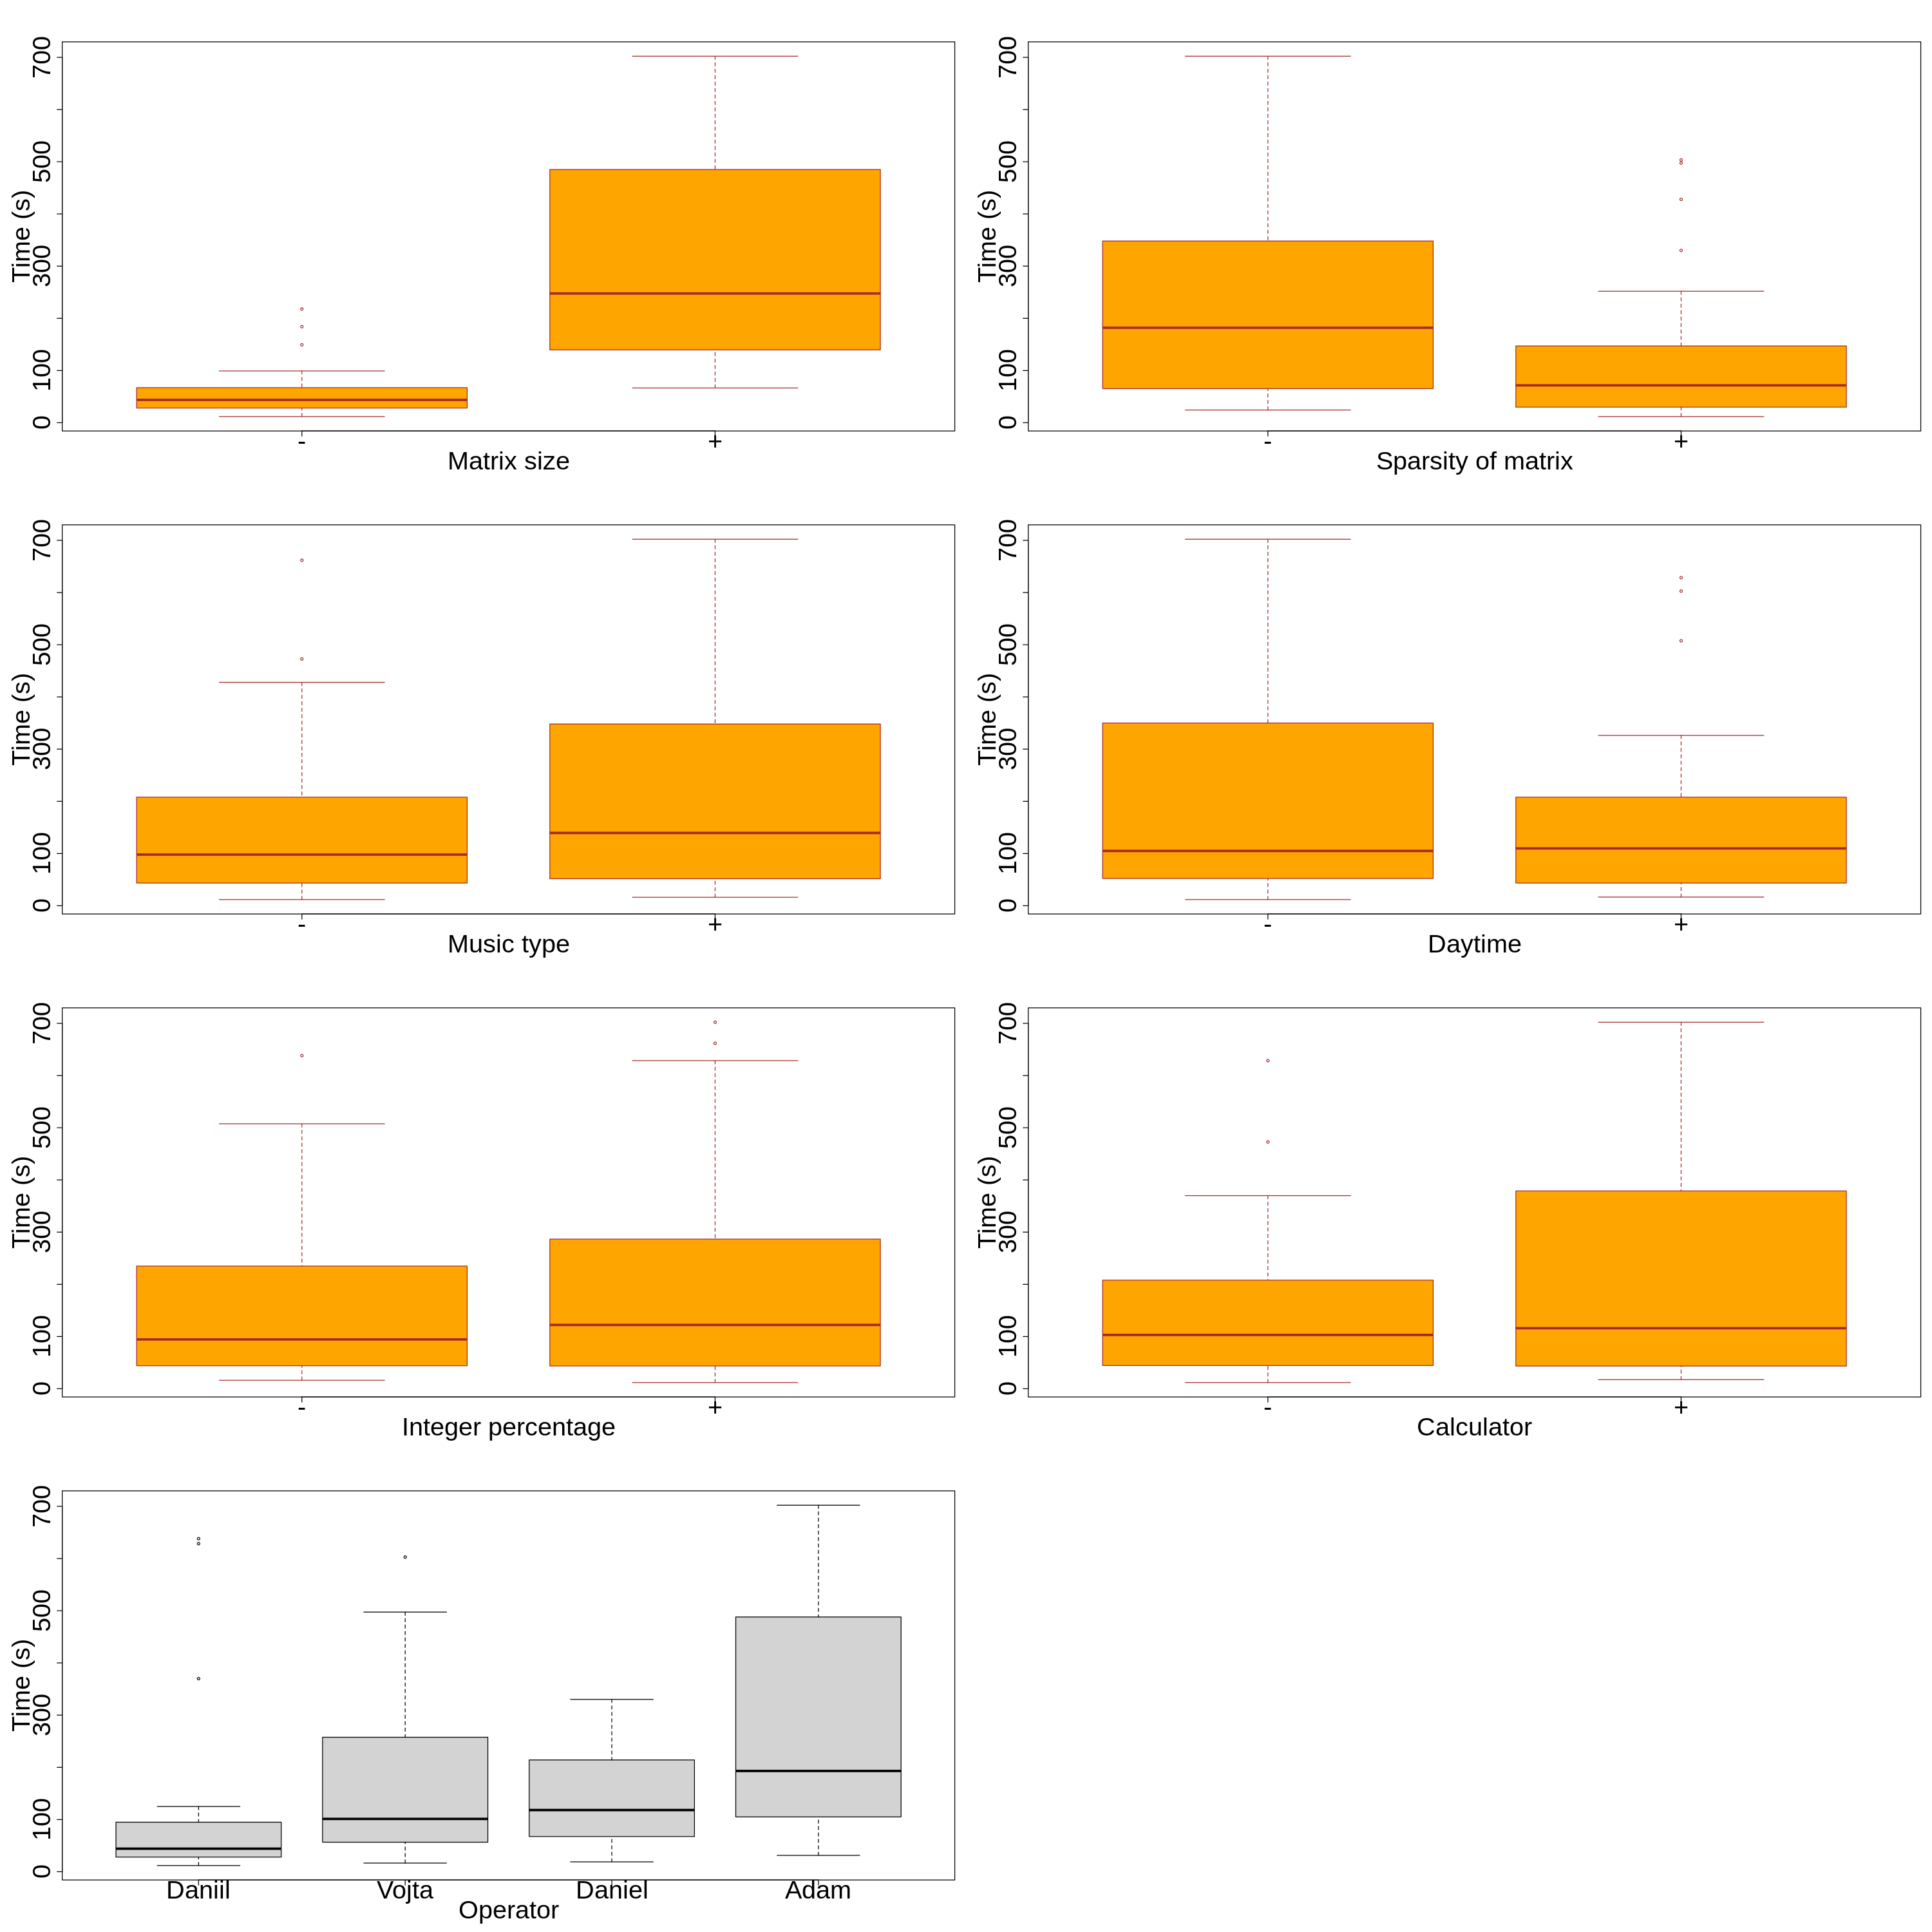

In [12]:
options(repr.plot.width=25, repr.plot.height=25)

par(mfrow=c(4,2), mar=c(5,6,4,1)+.1)    # set the plotting area into a 2*3 array
boxplot(time~mat_size, data=df, xlab="Matrix size", ylab="Time (s)", 
col="orange", border="brown", cex.lab = 3, cex.axis = 3)
boxplot(time~sparse, data=df, xlab="Sparsity of matrix", ylab="Time (s)",
col="orange", border="brown", cex.lab = 3, cex.axis = 3)
boxplot(time~music, data=df, xlab="Music type", ylab="Time (s)", col="orange",
border="brown", cex.lab = 3, cex.axis = 3)
boxplot(time~daytime, data=df, xlab="Daytime", ylab="Time (s)", col="orange",
border="brown", cex.lab = 3, cex.axis = 3)
boxplot(time~int_perc, data=df, xlab="Integer percentage", ylab="Time (s)",
col="orange", border="brown", cex.lab = 3, cex.axis = 3)
boxplot(time~calc, data=df, xlab="Calculator", ylab="Time (s)", col="orange",
border="brown", cex.lab = 3, cex.axis = 3)
boxplot(time~operator, data=df, xlab="Operator", ylab="Time (s)",
cex.lab = 3, cex.axis = 3)

Since we are performing full factorial desgin experiment, so there are no generators. However, we now work with blocks and our goal is determine whether there is any significant difference between operators who performed computations, or it is just a nuisance factor.

In [13]:
df_model = df %>% dplyr::select(mat_size:time)

anova <- aov(time~.,df_model)
summary(anova)

            Df  Sum Sq Mean Sq F value   Pr(>F)    
mat_size     1 1000975 1000975  84.229 1.30e-12 ***
sparse       1  226683  226683  19.075 5.74e-05 ***
music        1   82534   82534   6.945   0.0109 *  
daytime      1   49190   49190   4.139   0.0468 *  
int_perc     1   31024   31024   2.611   0.1120    
calc         1   79404   79404   6.682   0.0125 *  
operator     3  144298   48099   4.047   0.0115 *  
Residuals   54  641733   11884                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [14]:
anova <- aov(time~. - int_perc,df_model)
summary(anova)

            Df  Sum Sq Mean Sq F value   Pr(>F)    
mat_size     1 1000975 1000975  83.647 1.24e-12 ***
sparse       1  226683  226683  18.943 5.90e-05 ***
music        1   82534   82534   6.897  0.01116 *  
daytime      1   49190   49190   4.111  0.04747 *  
calc         1   79404   79404   6.635  0.01271 *  
operator     3  158892   52964   4.426  0.00739 ** 
Residuals   55  658163   11967                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Using ANOVA we can find out if `operator` is significant. After we extracted not significant variables, we end up with results, that operator is a statistically significant variable and not only a nuisance factor.

##  **2. Count the individual effects (include the substitution structure).** 
## **3) Find out what factors and their interactions appear significant (use daniel and pareto plot). Create main effects plot, interaction plot, boxplots. What can be inferred from the data? Comment carefully. If you know another useful visualization of the measured values, do it.**

To compute individual effects, we will first plot few very useful plots, such as Daniel plot or interaction plot.

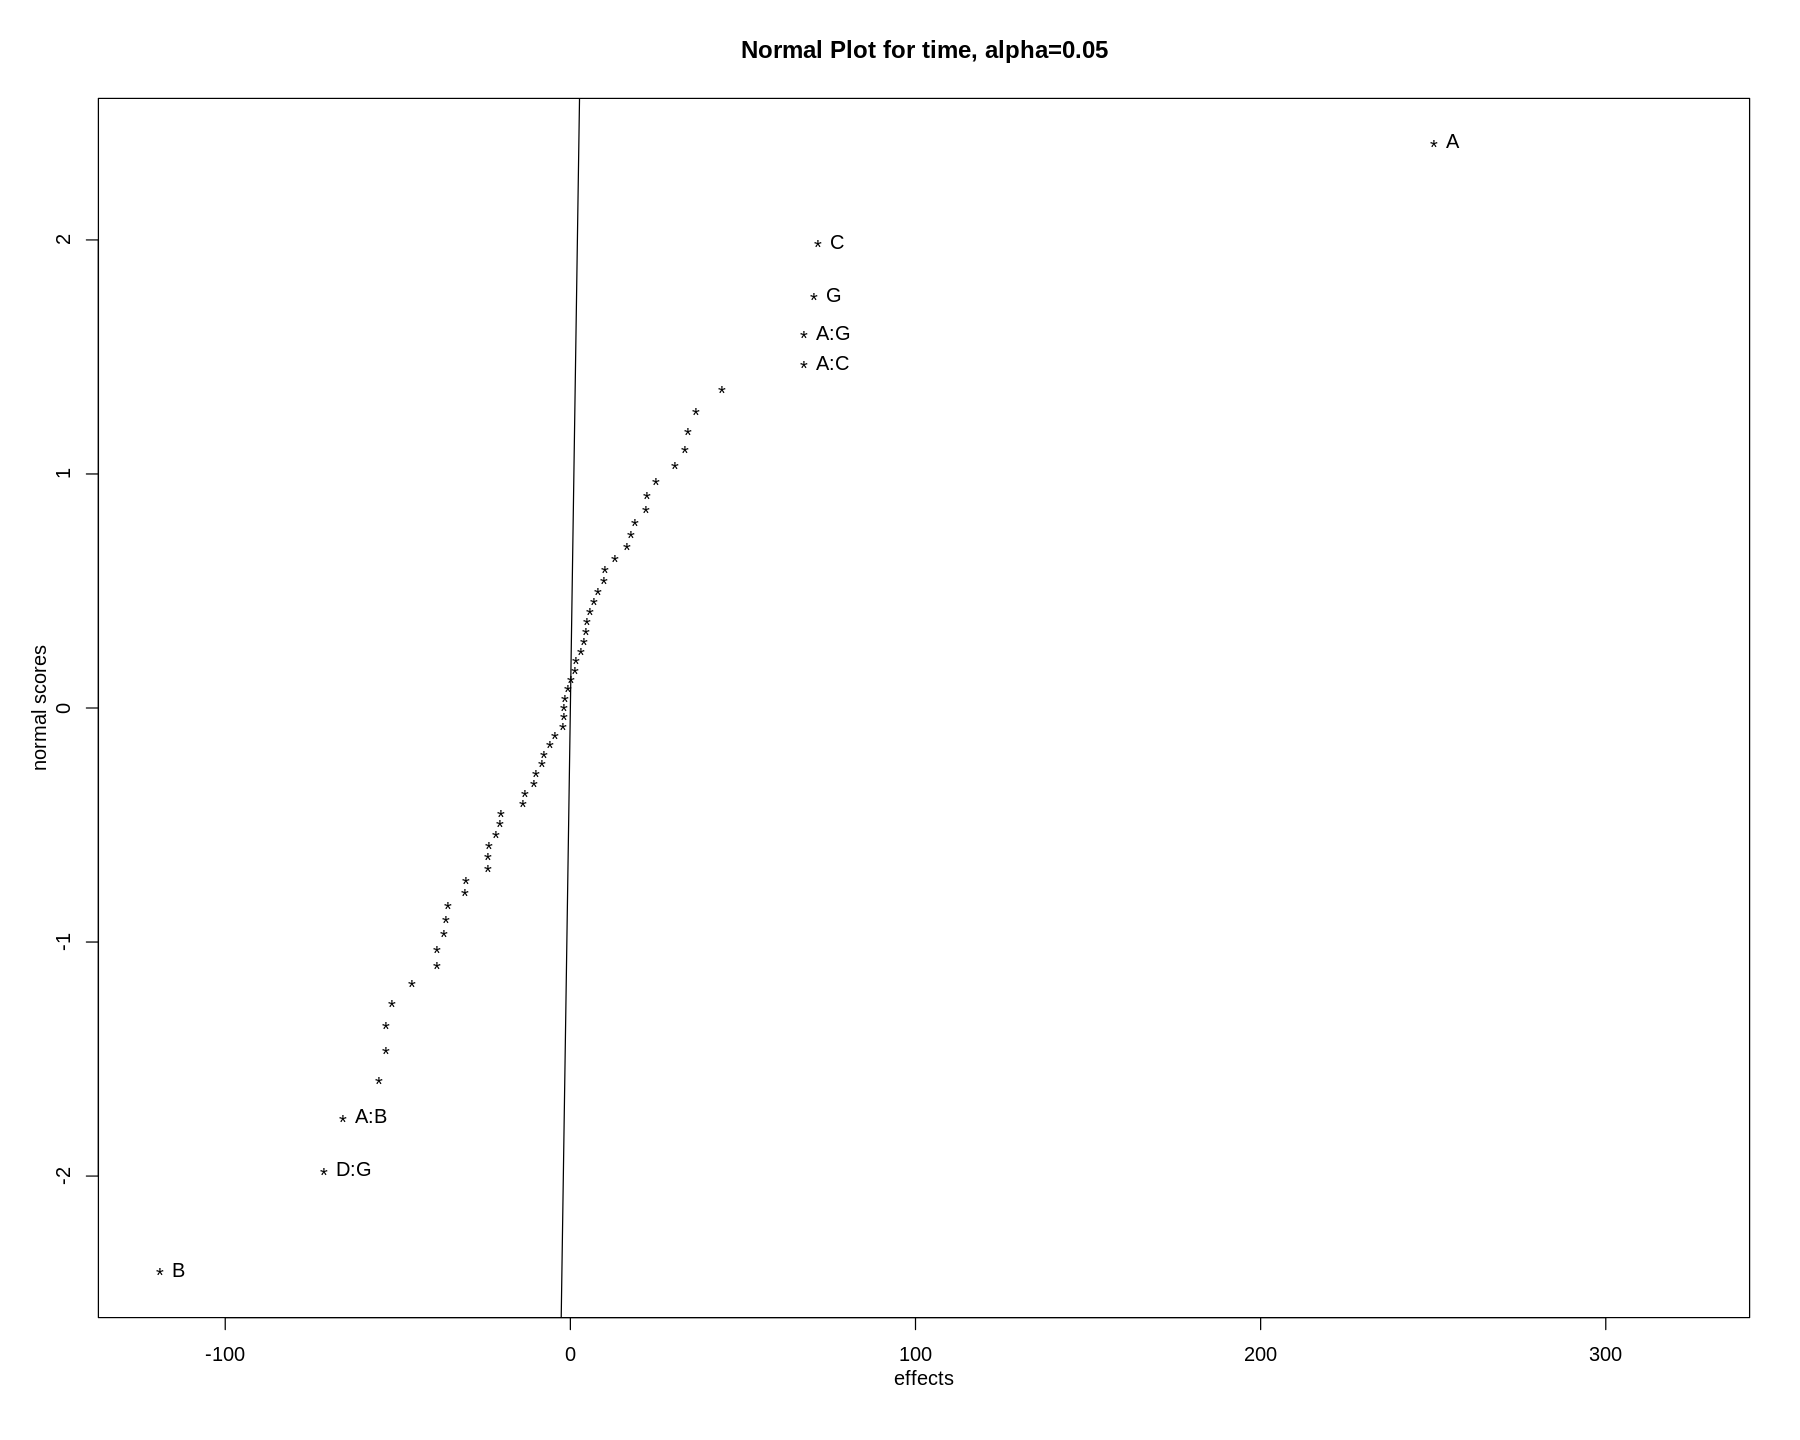

In [15]:
options(repr.plot.width=15, repr.plot.height=12)

DP = DanielPlot(design)
qqline(DanielPlot(design)$y)

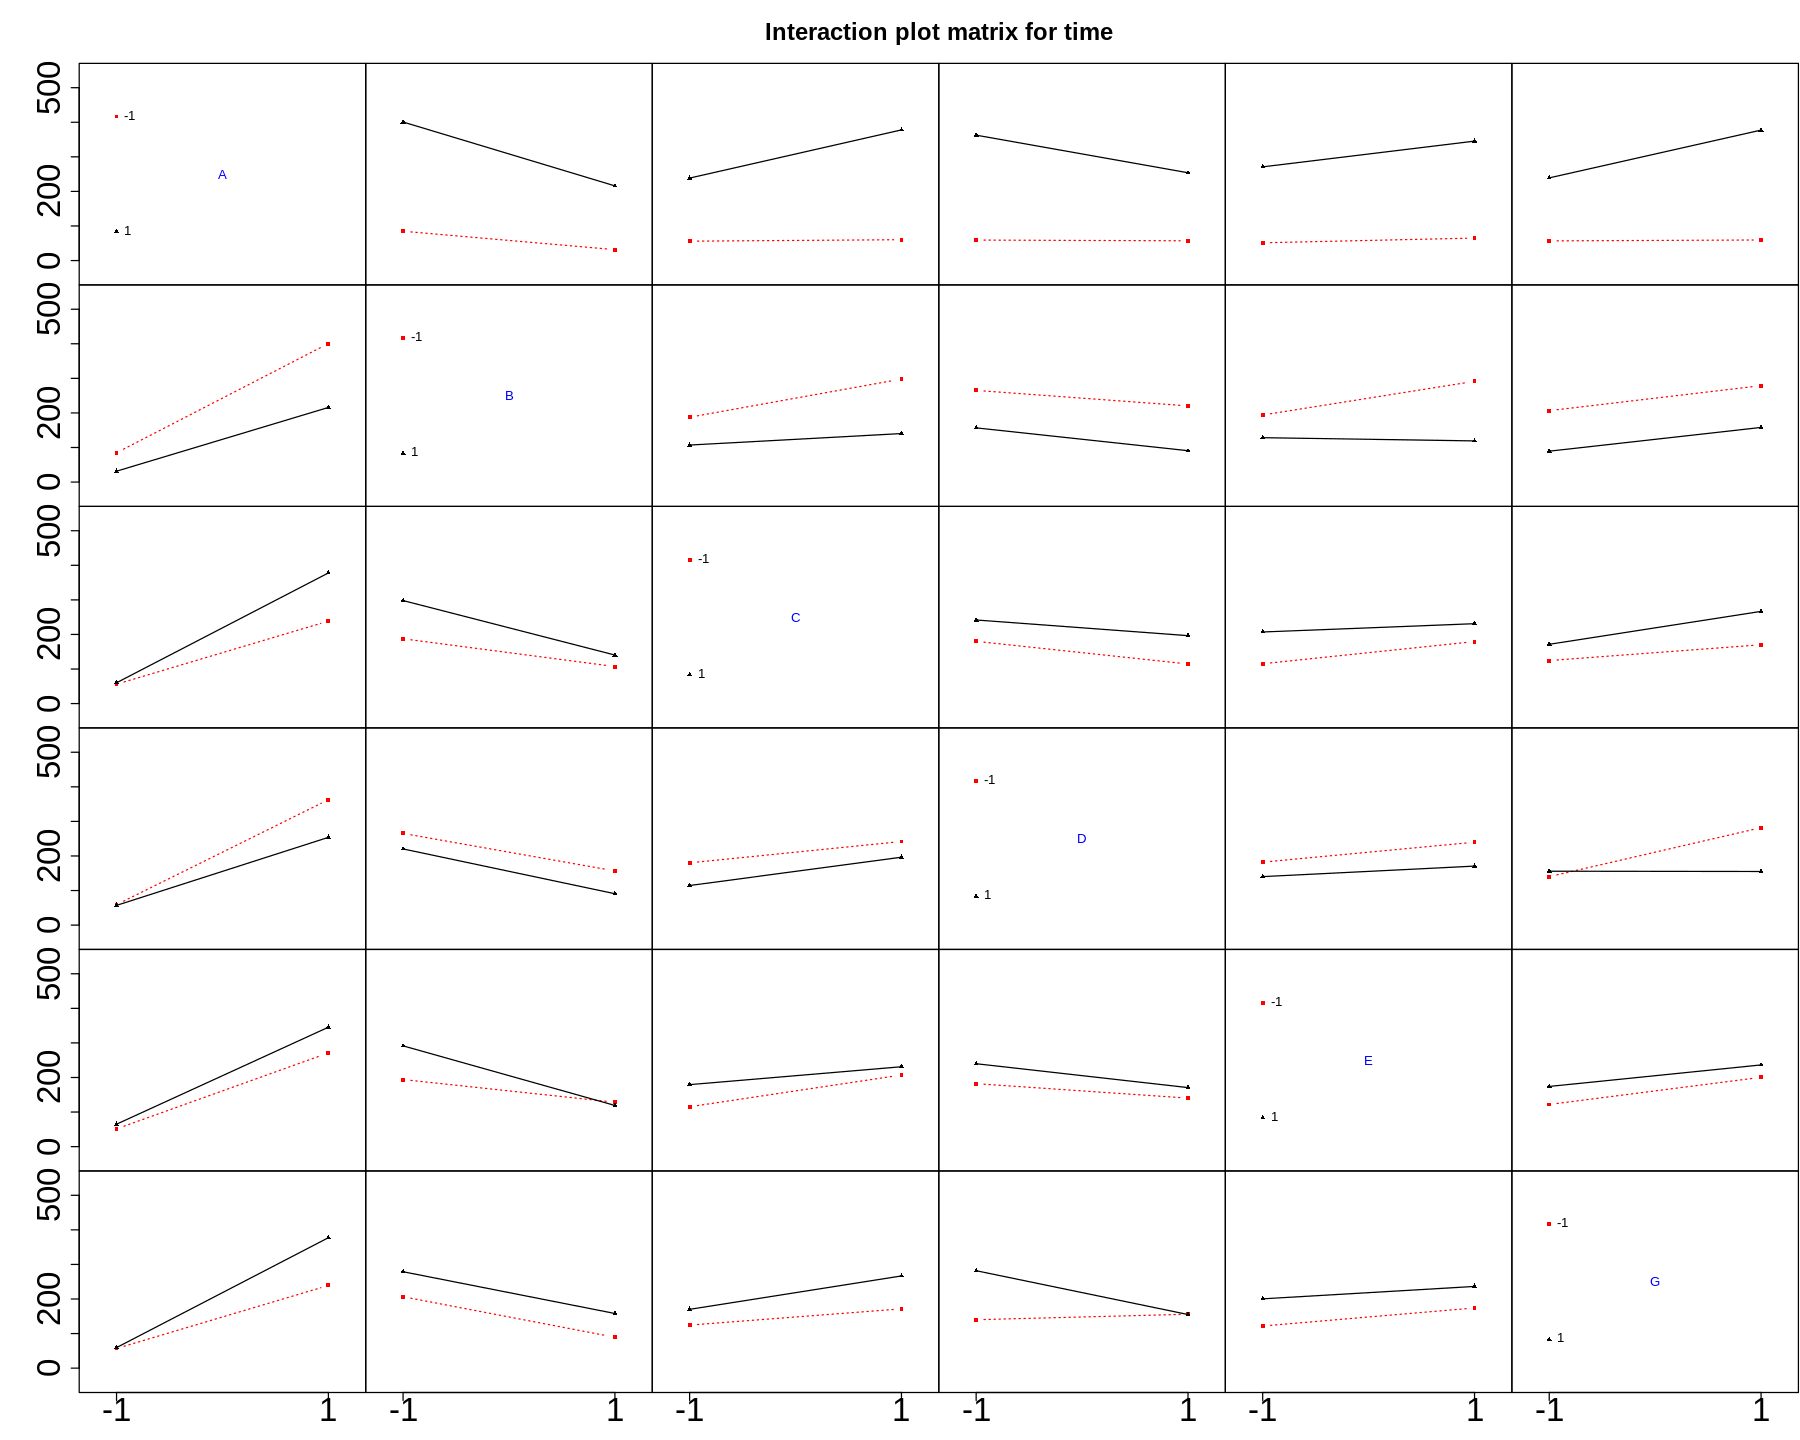

In [16]:
IAPlot(design, cex.xax = 2.5, cex.main = 2.5)

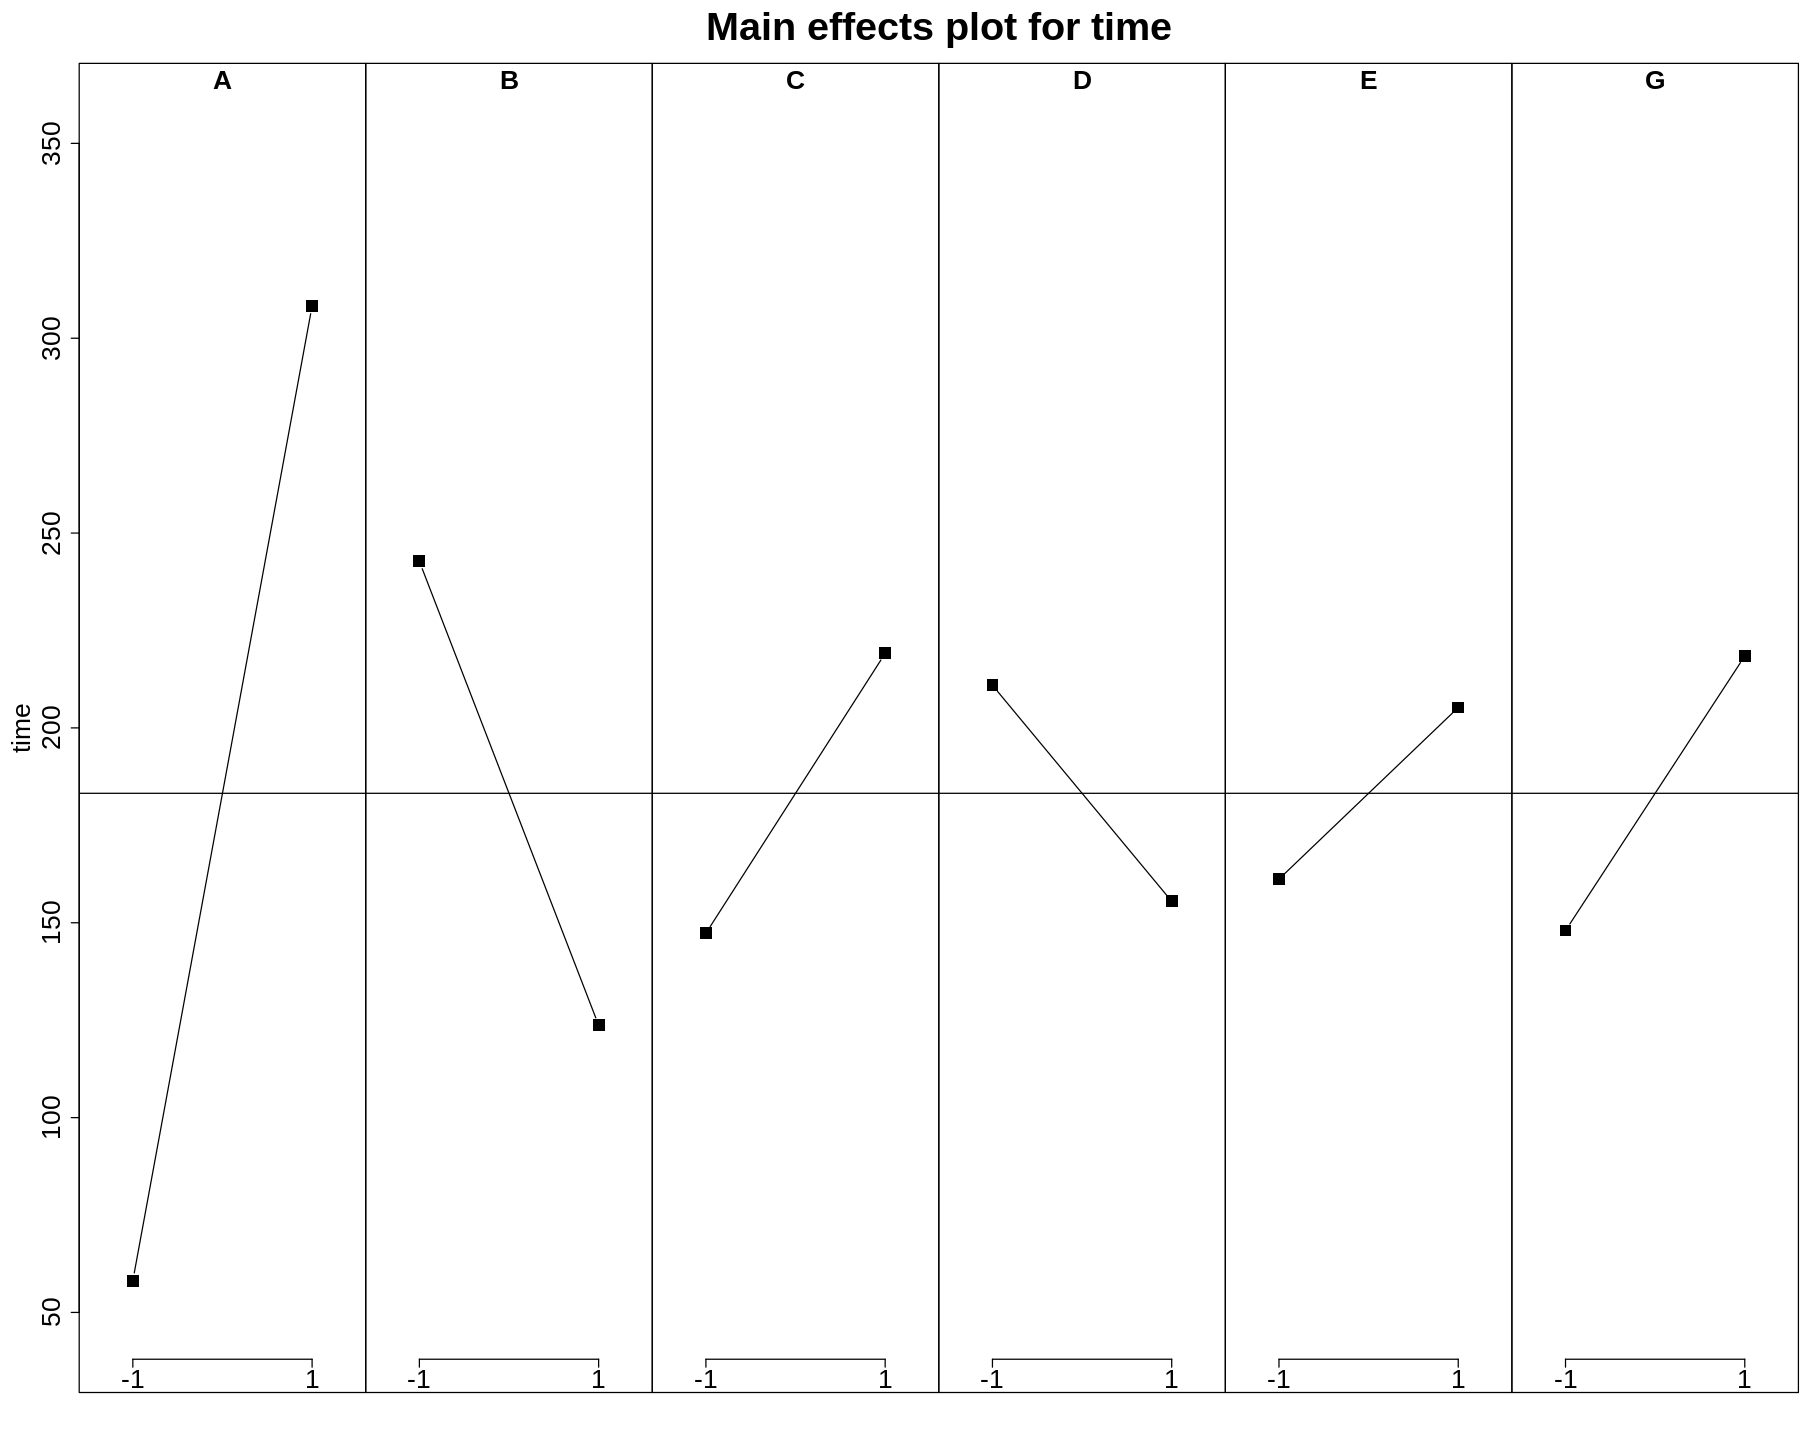

In [17]:
MEPlot(design, cex.xax = 2, cex.main = 2)

It seems that larges effect have variables A, B, C and G.

In [18]:
effects <- cbind(DP$effect, DP$x)
effects[1:6,]

A,250.121875
B,-119.028125
C,71.821875
D,-55.446875
E,44.034375
G,70.446875


We continue with Pareto plot.

In [19]:
options(warn=-1)

rate_pareto = facDesign(k = 6, replicates = 1)
response(rate_pareto) = df$time[rate_pareto[,1]]

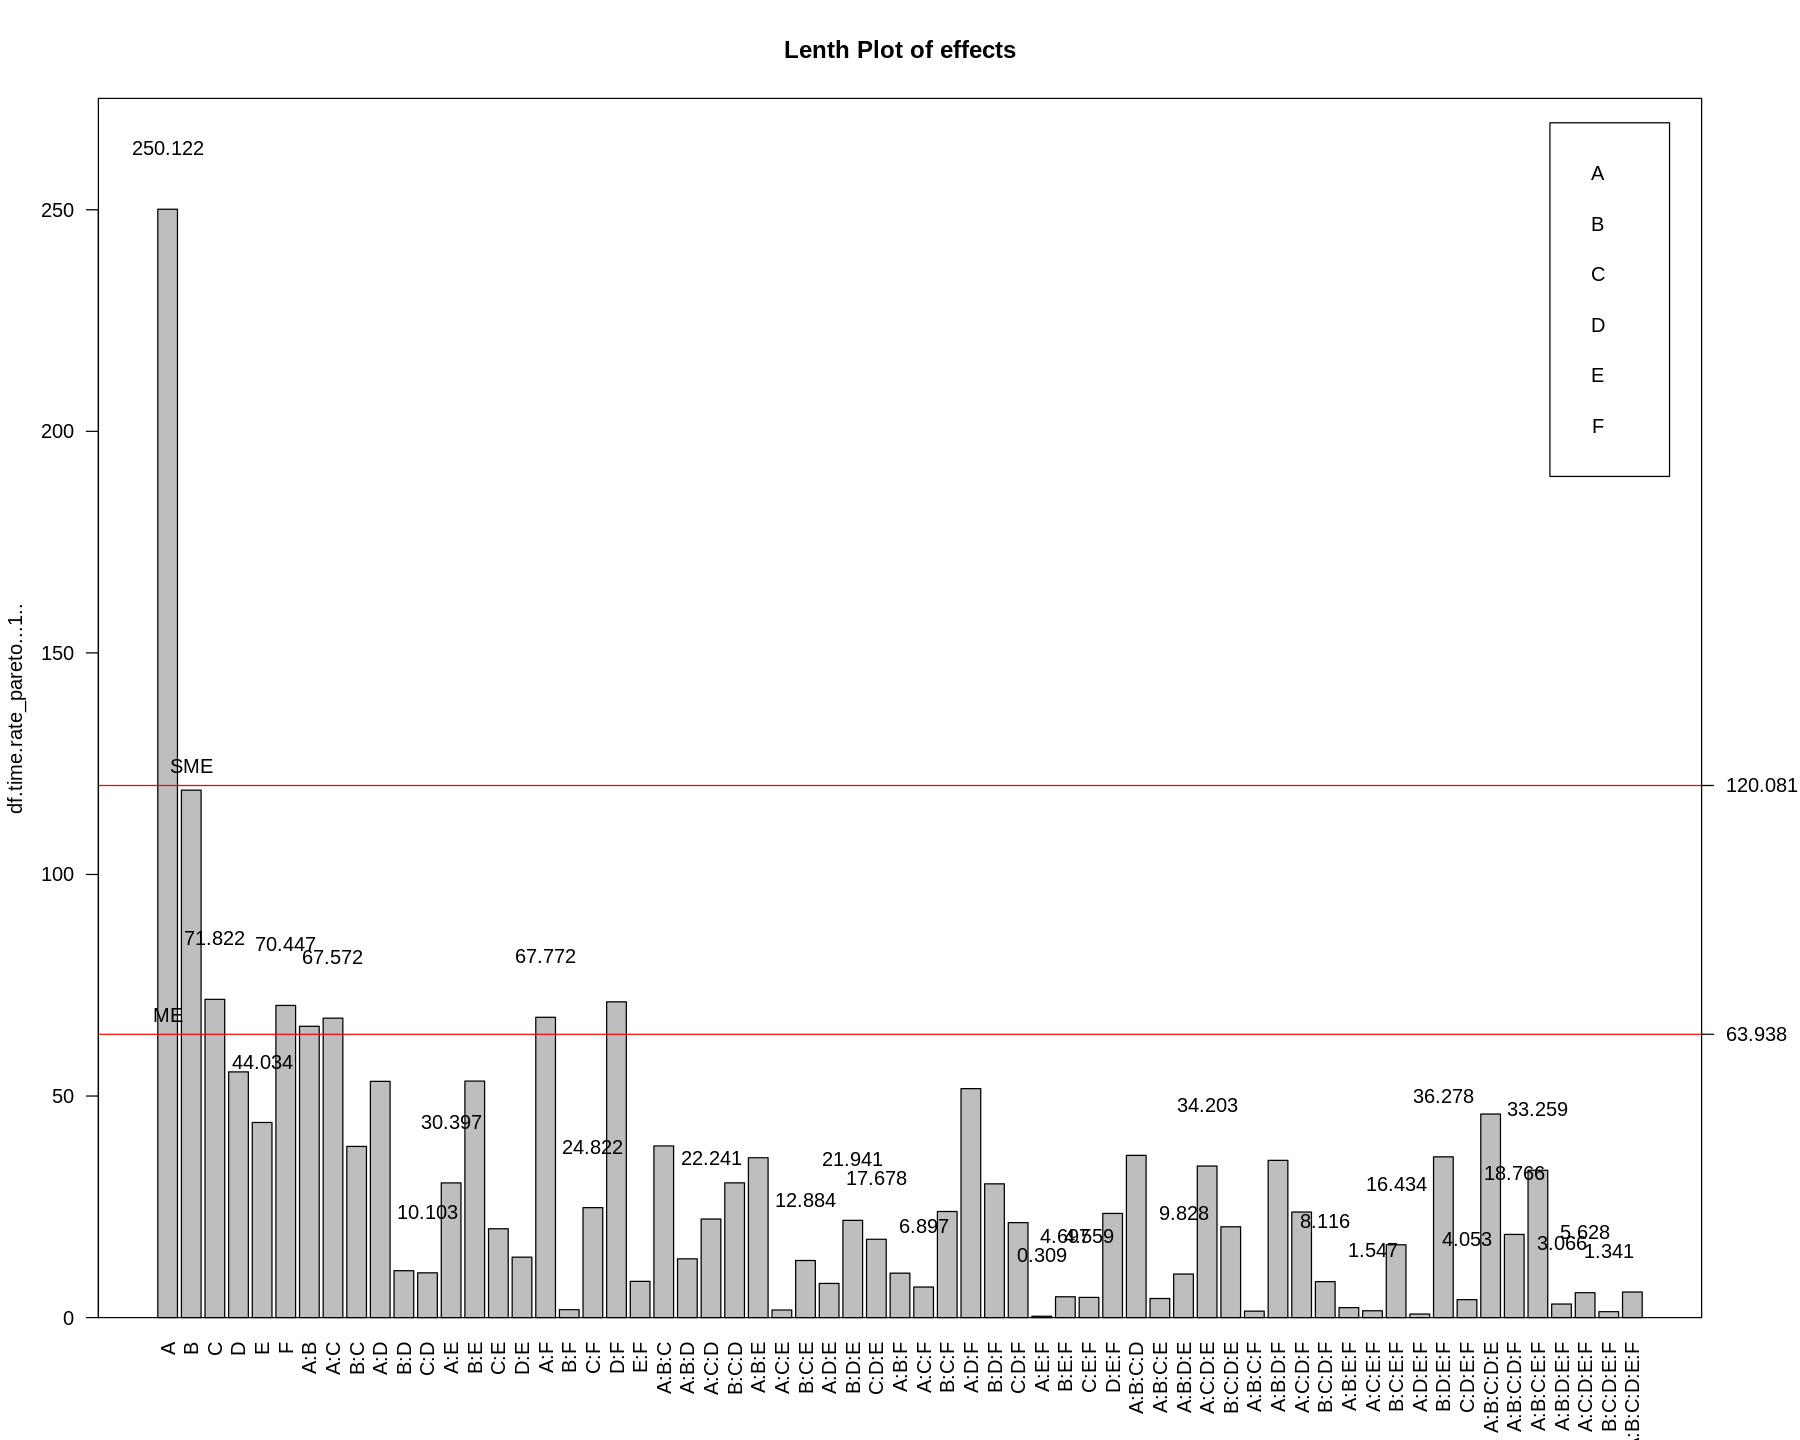

In [20]:
paretoPlot(rate_pareto)

In [21]:
options(warn=0)

We can see the most influential effects of all variables and their interactions. We display top 8 most influential.

In [22]:
effects <- cbind(DP$effect, DP$x)
ord = as.numeric(effects[,2])
effects[order(abs(ord), decreasing=TRUE),][1:8,]


A,250.121875
B,-119.028125
C,71.821875
D:G,-71.259375
G,70.446875
A:G,67.771875
A:C,67.571875
A:B,-65.740625


          A           B           C           D           E           F 
        NaN         NaN         NaN         NaN         NaN         NaN 
        A:B         A:C         B:C         A:D         B:D         C:D 
        NaN         NaN         NaN         NaN         NaN         NaN 
        A:E         B:E         C:E         D:E         A:F         B:F 
        NaN         NaN         NaN         NaN         NaN         NaN 
        C:F         D:F         E:F       A:B:C       A:B:D       A:C:D 
        NaN         NaN         NaN         NaN         NaN         NaN 
      B:C:D       A:B:E       A:C:E       B:C:E       A:D:E       B:D:E 
        NaN         NaN         NaN         NaN         NaN         NaN 
      C:D:E       A:B:F       A:C:F       B:C:F       A:D:F       B:D:F 
        NaN         NaN         NaN         NaN         NaN         NaN 
      C:D:F       A:E:F       B:E:F       C:E:F       D:E:F     A:B:C:D 
        NaN         NaN         NaN         NaN    

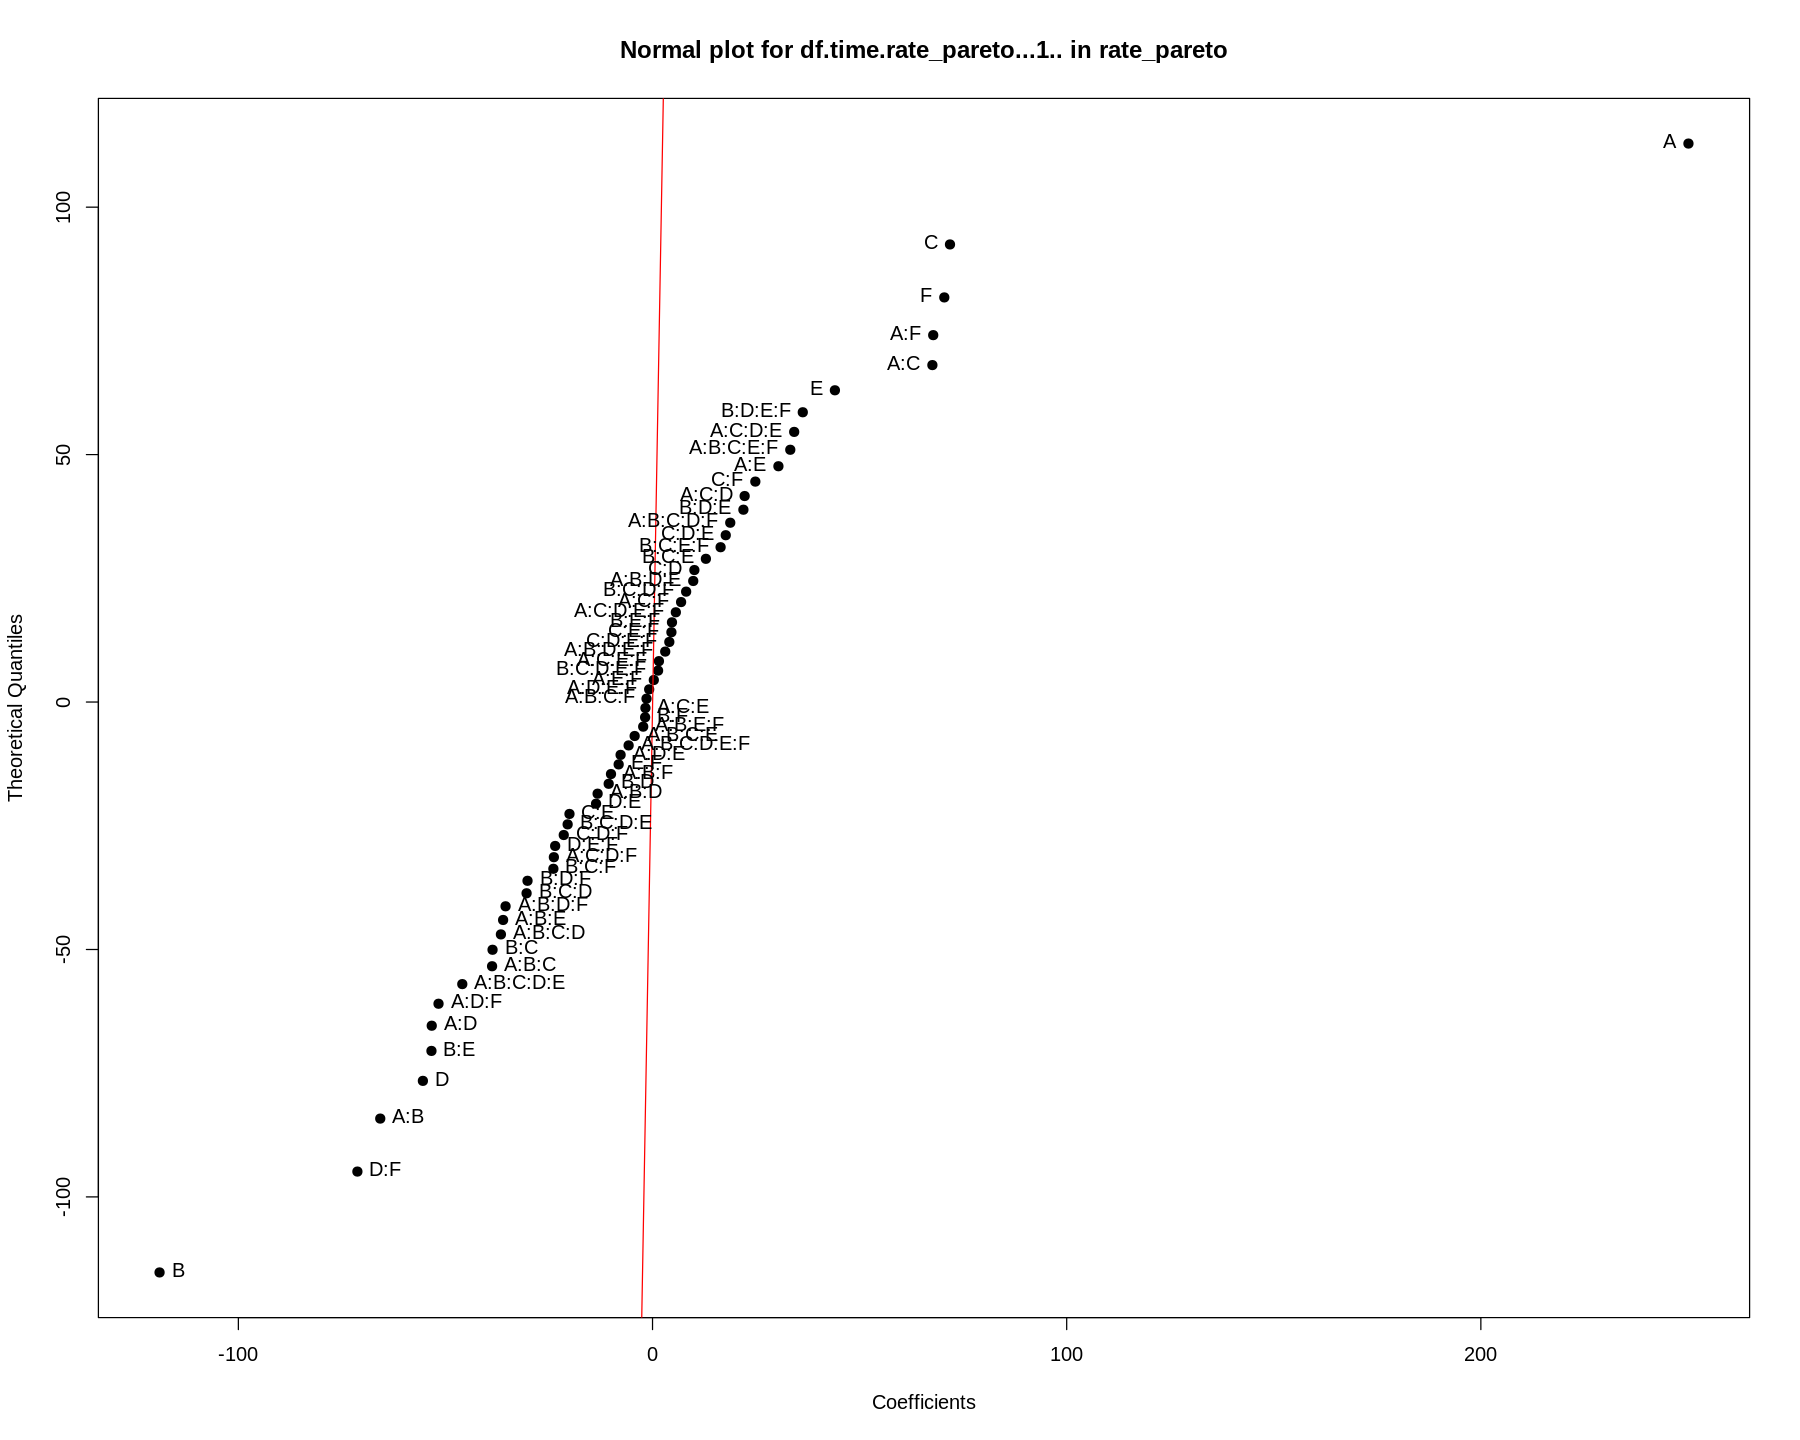

In [24]:
options(warn=-1)
normalPlot(rate_pareto)

In [25]:
options(warn=0)

## **4. Perform analysis of variance, find and validate the resulting model without center point.**

First, we create a model with interactions of second order.

In [26]:
model_full = aov(time ~ (.)^2, data=design)
summary(model_full)

            Df  Sum Sq Mean Sq F value   Pr(>F)    
A            1 1000975 1000975 125.285 3.49e-14 ***
B            1  226683  226683  28.372 3.67e-06 ***
C            1   82534   82534  10.330  0.00252 ** 
D            1   49190   49190   6.157  0.01718 *  
E            1   31024   31024   3.883  0.05539 .  
G            1   79404   79404   9.938  0.00298 ** 
A:B          1   69149   69149   8.655  0.00529 ** 
A:C          1   73055   73055   9.144  0.00424 ** 
A:D          1   45470   45470   5.691  0.02164 *  
A:E          1   14784   14784   1.850  0.18100    
A:G          1   73488   73488   9.198  0.00414 ** 
B:C          1   23874   23874   2.988  0.09122 .  
B:D          1    1792    1792   0.224  0.63820    
B:E          1   45588   45588   5.706  0.02148 *  
B:G          1      51      51   0.006  0.93651    
C:D          1    1633    1633   0.204  0.65351    
C:E          1    6434    6434   0.805  0.37463    
C:G          1    9858    9858   1.234  0.27298    
D:E         

We substract all unsignificant variables and compare both models.

In [27]:
# significant variables
model_sgnf = aov(time ~ (.)^2-E:G-D:E-C:G-C:E-C:D-B:G-B:D-B:C-A:E-E, data=design)
summary(model_sgnf)

            Df  Sum Sq Mean Sq F value   Pr(>F)    
A            1 1000975 1000975 128.255 1.57e-15 ***
B            1  226683  226683  29.045 1.82e-06 ***
C            1   82534   82534  10.575  0.00203 ** 
D            1   49190   49190   6.303  0.01527 *  
G            1   79404   79404  10.174  0.00244 ** 
A:B          1   69149   69149   8.860  0.00445 ** 
A:C          1   73055   73055   9.361  0.00353 ** 
A:D          1   45470   45470   5.826  0.01942 *  
A:G          1   73488   73488   9.416  0.00344 ** 
B:E          2   76612   38306   4.908  0.01123 *  
D:G          1   81246   81246  10.410  0.00219 ** 
Residuals   51  398033    7805                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [28]:
anova(model_sgnf,model_full)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,51,398033.4,NA,NA,NA,NA
2,42,335562.3,9,62471.07,0.8687855,0.5597711


There is no significant difference between these two models, so we will continue with new model. In next step, we will create another model with only 8 variables or their interactions with the most influential effect. We compare both models as well.

In [31]:
# variables with largest effect
model_effect = aov(time ~ A+B+C+D:G+G+A:G+A:C+A:B, data=design)
summary(model_effect)

            Df  Sum Sq Mean Sq F value   Pr(>F)    
A            1 1000975 1000975 103.924 3.44e-14 ***
B            1  226683  226683  23.535 1.08e-05 ***
C            1   82534   82534   8.569  0.00500 ** 
G            1   79404   79404   8.244  0.00583 ** 
D:G          2  130436   65218   6.771  0.00238 ** 
A:G          1   73488   73488   7.630  0.00783 ** 
A:C          1   73055   73055   7.585  0.00800 ** 
A:B          1   69149   69149   7.179  0.00976 ** 
Residuals   54  520116    9632                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [32]:
anova(model_effect, model_sgnf)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,54,520115.6,NA,NA,NA,NA
2,51,398033.4,3,122082.2,5.214131,0.003231037


According to ANOVA, there is significant difference between models, so we keep the previous one. In the following part we validate it.

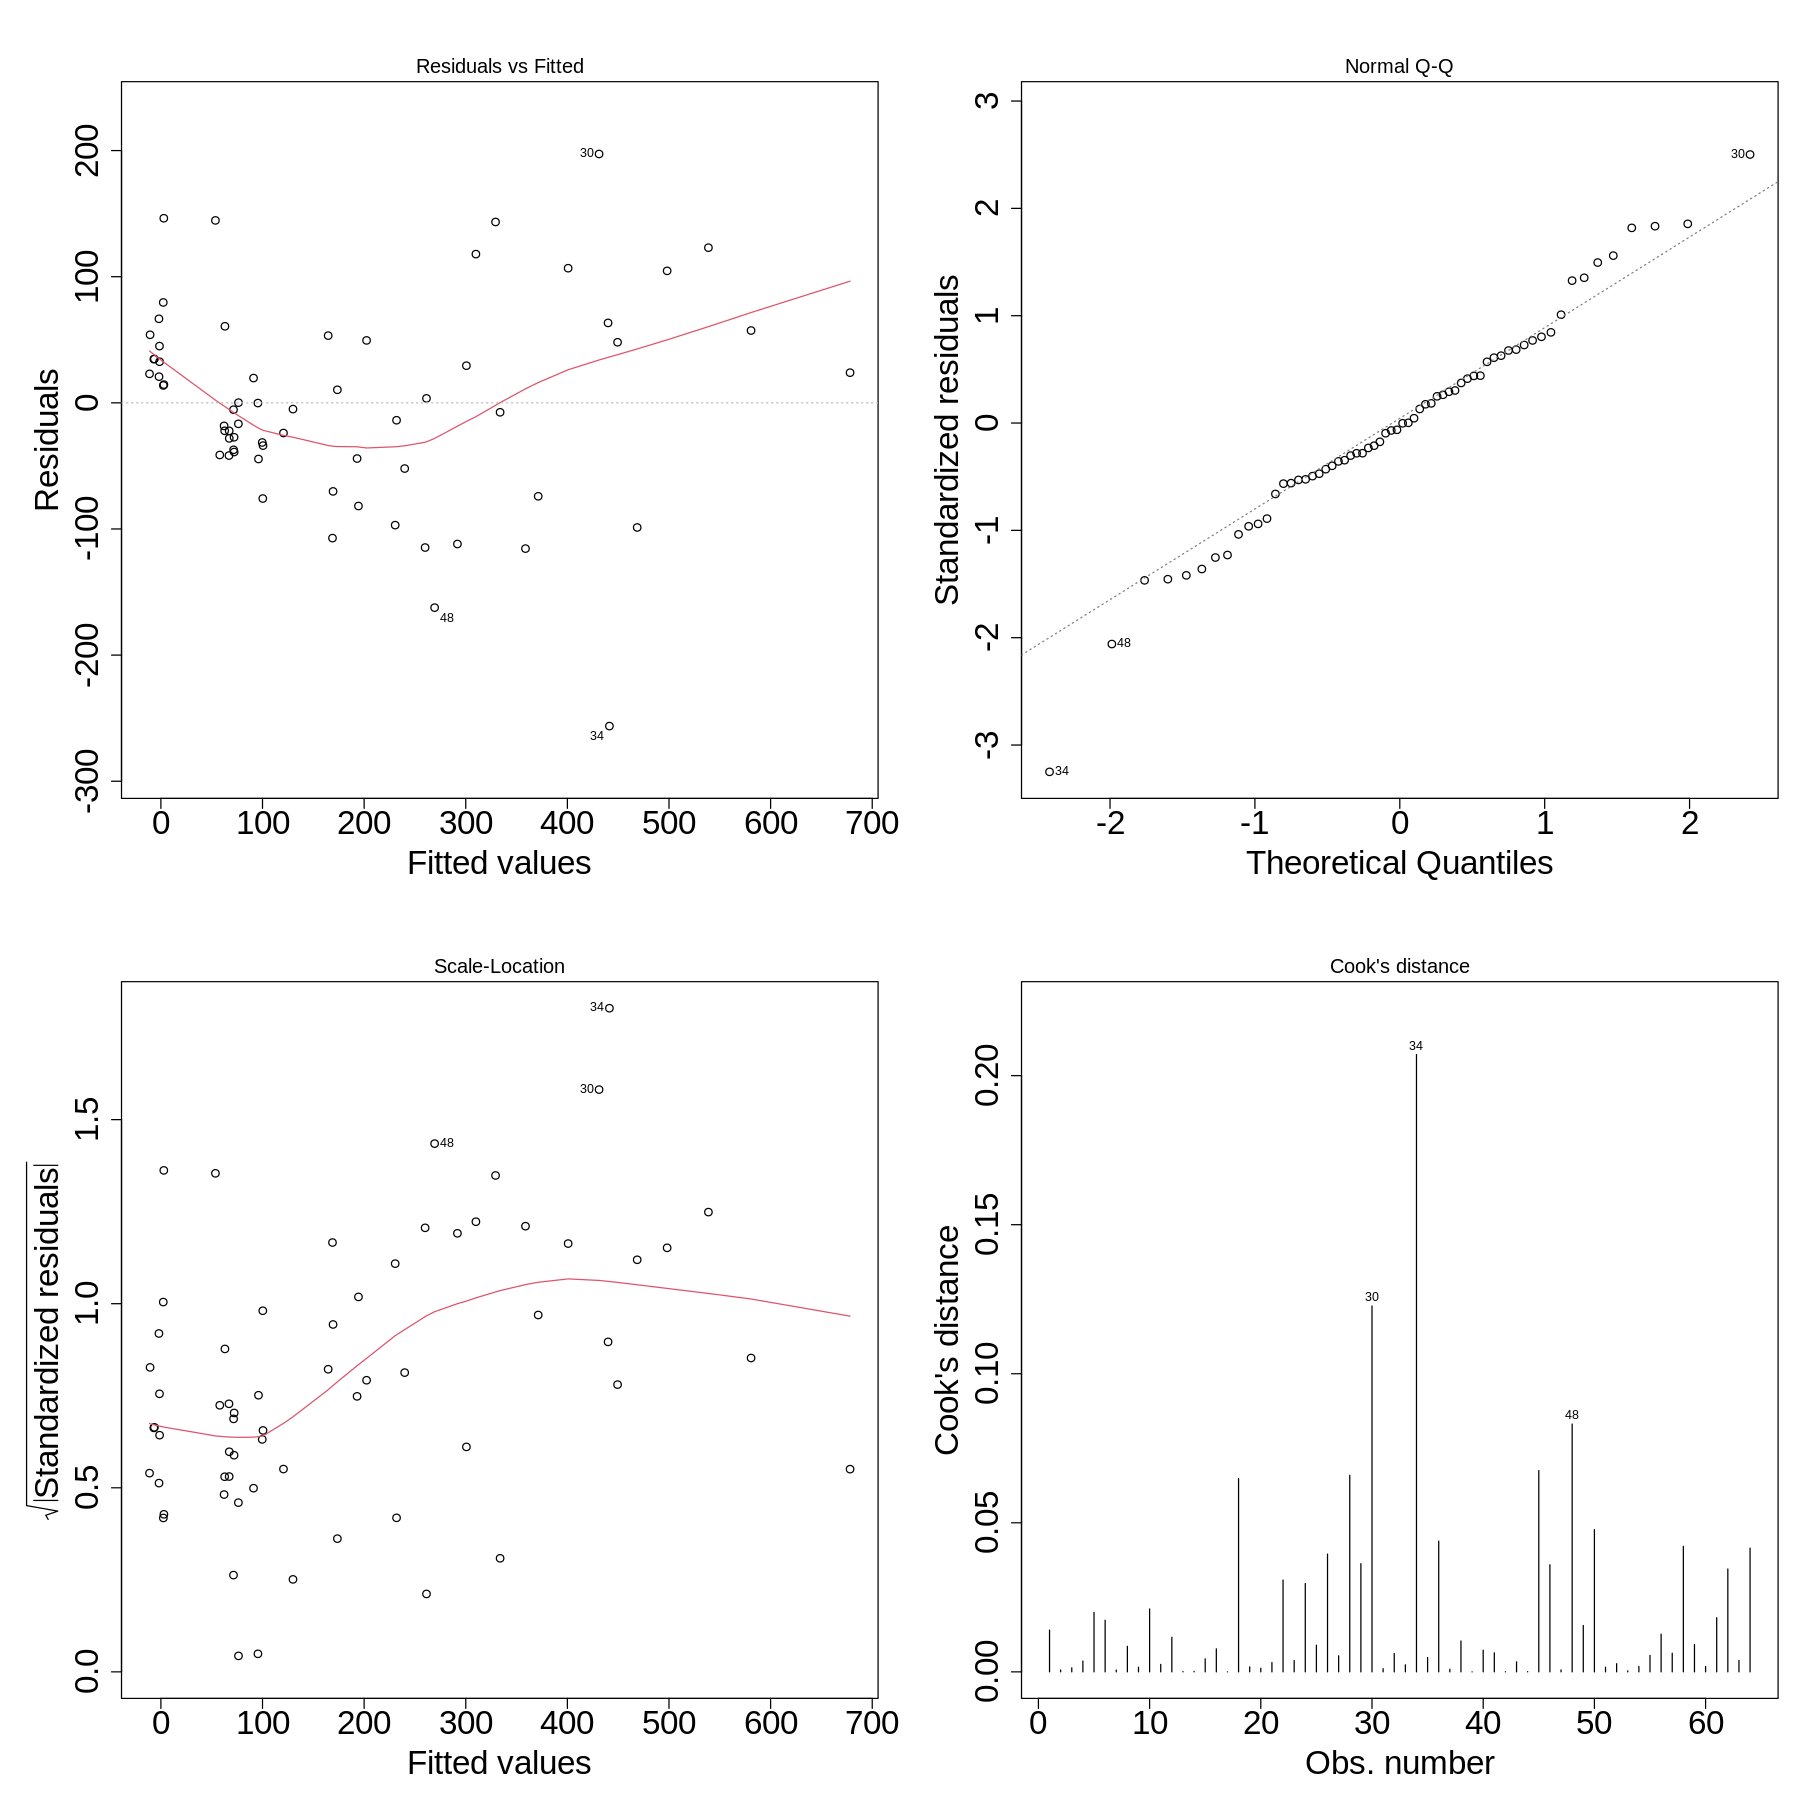

In [33]:
options(repr.plot.width=15, repr.plot.height=15)

par(mfrow = c(2,2),mar=c(5,6,4,1)+.1)
plot(model_sgnf,which = c(1:3,4),cex.lab = 2, cex.axis = 2)

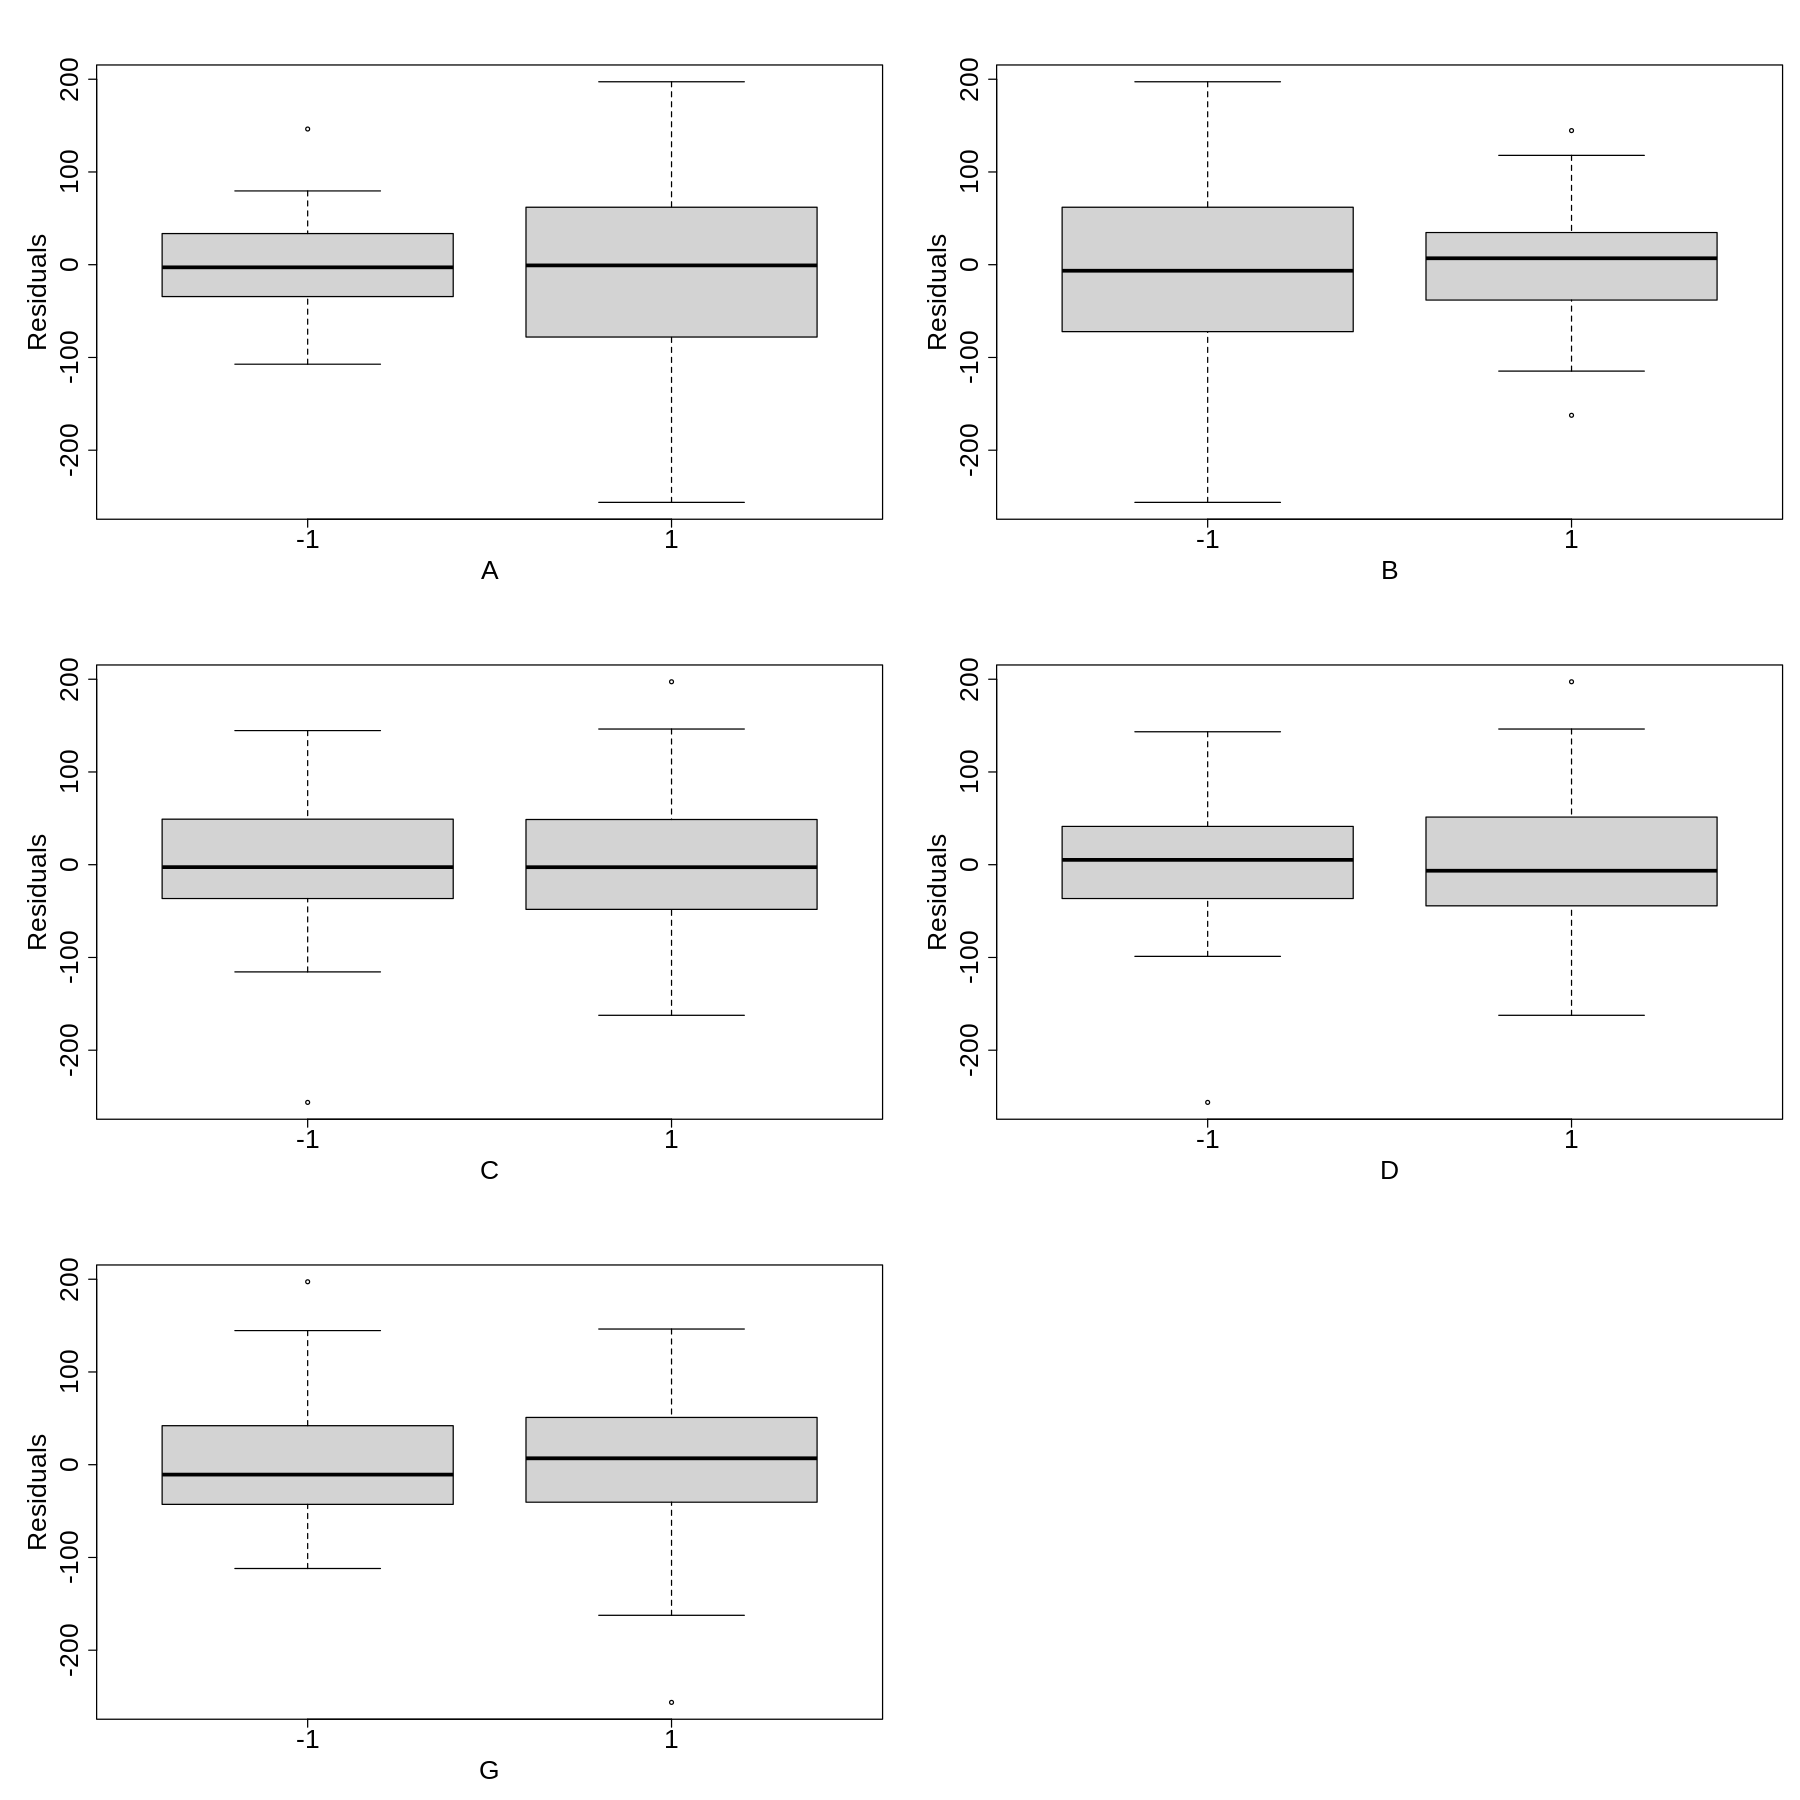

In [34]:
par(mfrow = c(3,2),mar=c(5,6,4,1)+.1)
plot(resid(model_sgnf) ~ A+B+C+D:G+G+A:G+A:C+A:B, data=design, ylab="Residuals",
                                            cex.lab = 2, cex.axis = 2)

There few outliers and maybe some trends in residuals vs. fitted values, but we hope that this model is sufficient.

## **5. Use additional assumptions and additional measurements at the centres, and confirm or reject assumption of the linear dependence in the numerical variables.**

We prepare the data with centerpoints and build model with only significant variables.

In [37]:
data_raw_centers <- read.csv("NAEX_HW_2_DATA_centres.csv",
                   sep = ",", header = T, fileEncoding="UTF-8-BOM")
data_centers = data_raw_centers[order(data_raw_centers$index, decreasing = FALSE),]

nr = nrow(data_centers)
centerpoints = data_centers[65:nr,]
centerpoints

,index,mat_size,sparse,music,conc,int_perc,calc,operator,time
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
65,65,0,0,+,+,0,+,Daniel,74.5
66,66,0,0,+,-,0,+,Daniel,103.1
67,67,0,0,+,+,0,-,Daniel,94.9
68,68,0,0,+,-,0,-,Daniel,98.3
69,69,0,0,-,+,0,+,Daniel,102.5
70,70,0,0,-,-,0,+,Daniel,104.1
71,71,0,0,-,-,0,-,Daniel,144.4
72,72,0,0,-,+,0,-,Daniel,118.9


In [39]:
m <- FrF2(2^6, 6, replications = 1, randomize = F, factor.names = c("A","B","C","D","E","G"))
Time <- data_centers[1:64, "time"]
m <- add.response(m, Time)
response.names(m)
head(m)

creating full factorial with 64 runs ...




[1] "Time"

,A,B,C,D,E,G,Time
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
1,-1,-1,-1,-1,-1,-1,64.7
2,1,-1,-1,-1,-1,-1,218.1
3,-1,1,-1,-1,-1,-1,18.9
4,1,1,-1,-1,-1,-1,66.6
5,-1,-1,1,-1,-1,-1,81.9
6,1,-1,1,-1,-1,-1,297.2


In [40]:
mcp <- add.center(m, 8)
mcp$C[65:72] <- c(1,1,1,1,-1,-1,-1,-1)
mcp$D[65:72] <- c(1,-1,1,-1,1,-1,1,-1)
mcp$G[65:72] <- c(1,1,-1,-1,1,1,-1,-1)

mcp$Time <- centerpoints[, "time"]

#mcp$Curv <- c(rep(0, times = 64), rep(1, times = 8))

head(mcp)

,A,B,C,D,E,G,Time
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1,-1,-1,-1,-1,-1,74.5
2,1,-1,-1,-1,-1,-1,103.1
3,-1,1,-1,-1,-1,-1,94.9
4,1,1,-1,-1,-1,-1,98.3
5,-1,-1,1,-1,-1,-1,102.5
6,1,-1,1,-1,-1,-1,104.1


In [41]:
model_full = aov(Time ~ (.)^2, data = mcp)
summary(model_full)

            Df Sum Sq Mean Sq F value   Pr(>F)    
A            1     66      66   0.566 0.455374    
B            1   5227    5227  45.096 1.67e-08 ***
C            1   6684    6684  57.659 7.11e-10 ***
D            1      1       1   0.008 0.929703    
E            1      0       0   0.000 1.000000    
G            1     73      73   0.626 0.432444    
A:B          1   2735    2735  23.597 1.21e-05 ***
A:C          1   3125    3125  26.958 3.82e-06 ***
A:D          1      0       0   0.000 1.000000    
A:E          1      0       0   0.000 1.000000    
A:G          1      0       0   0.000 1.000000    
B:C          1   1689    1689  14.573 0.000373 ***
B:D          1      0       0   0.000 1.000000    
B:E          1      0       0   0.000 1.000000    
B:G          1      0       0   0.000 1.000000    
C:D          1     43      43   0.374 0.543382    
C:E          1      0       0   0.000 1.000000    
C:G          1     23      23   0.202 0.654735    
D:E          1      0       0  

In [42]:
## significant variables
model_sign = aov(Time ~ (.)^2 -E:G-D:E-C:E-B:G-B:E-B:D-A:G-A:E-A:D-E-D-C:G-D:G-C:D-G-A, data=mcp)
summary(model_sign)

            Df Sum Sq Mean Sq F value   Pr(>F)    
B            1   5227    5227   57.12 1.64e-10 ***
C            1   6684    6684   73.04 2.80e-12 ***
A:B          1   2735    2735   29.89 7.53e-07 ***
A:C          1   3125    3125   34.15 1.72e-07 ***
B:C          1   1689    1689   18.46 5.83e-05 ***
Residuals   66   6040      92                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

It is a bit unexpected that in the final model we miss variables E and G, which stand for `sparsity` and `calculator`. However, we continue with resulting model and we add to our model quadratic effect to determine whether the influence of quantitative variables is linear or not.

In [43]:
model_cube = aov(Time ~ A*B*C - A - A:B:C + iscube(mcp), data=mcp)
summary(model_cube)

            Df Sum Sq Mean Sq F value   Pr(>F)    
B            1   5227    5227   56.26 2.25e-10 ***
C            1   6684    6684   71.93 4.09e-12 ***
iscube(mcp)  1      0       0    0.00        1    
A:B          1   2735    2735   29.44 9.14e-07 ***
A:C          1   3125    3125   33.63 2.14e-07 ***
B:C          1   1689    1689   18.18 6.64e-05 ***
Residuals   65   6040      93                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

We can see that the influence of quantitative variables is linear.

##  6) Construct a regression model where you convert the coded quantitative variables to actual numerical values (use the other variables according to their significance).

In [80]:
data_raw <- read.csv("https://raw.githubusercontent.com/Daniel-Karlik/MEU_SKE/main/NAEX_HW_2_num.csv",
                   sep = ";", header = T, fileEncoding="UTF-8-BOM")
data_num = data_raw[order(data_raw$index, decreasing = FALSE),]
colnames(data_num)[5] <- "daytime"
head(data_num)

,index,mat_size,sparse,music,daytime,int_perc,calc,operator,time
,<int>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>
36,1,3,40,calm,low,20,yes,Daniil,64.7
4,2,5,40,calm,low,20,yes,Vojta,218.1
30,3,3,60,calm,low,20,yes,Daniel,18.9
32,4,5,60,calm,low,20,yes,Daniel,66.6
27,5,3,40,weird,low,20,yes,Daniel,81.9
11,6,5,40,weird,low,20,yes,Vojta,297.2


In [54]:
k = 6
m_time<-  FrF2(2^k, k, replications = 1, randomize = F,factor.names = c("A", "B","C", "D", "E", "G"))
time         <-  data_num[1:64,"time"]
m_time       <-  add.response(m_time, time)

creating full factorial with 64 runs ...




In [56]:
m_time2 <- add.center(m_time, 8)
m_time2$Curvature <- c(rep(0, times = 64), rep(1, times = 8))
m_time2$time[65:72] <- data_num[65:72, "time"]
m_time2$C[65:72] <- c(1,1,1,1,-1,-1,-1,-1)
m_time2$D[65:72] <- c(1,-1,1,-1,1,-1,-1,1)
m_time2$G[65:72] <- c(1,1,-1,-1,1,1,-1,-1)

In [58]:
m_time2$A_num <- data_num$mat_size
m_time2$B_num <- data_num$sparse
m_time2$E_num <- data_num$int_perc
m_time2$operator <- data_num$operator
head(m_time2)

,A,B,C,D,E,G,time,Curvature,A_num,B_num,E_num,operator
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<chr>
1,-1,-1,-1,-1,-1,-1,64.7,0,3,40,20,Daniil
2,1,-1,-1,-1,-1,-1,218.1,0,5,40,20,Vojta
3,-1,1,-1,-1,-1,-1,18.9,0,3,60,20,Daniel
4,1,1,-1,-1,-1,-1,66.6,0,5,60,20,Daniel
5,-1,-1,1,-1,-1,-1,81.9,0,3,40,20,Daniel
6,1,-1,1,-1,-1,-1,297.2,0,5,40,20,Vojta


We prepared numeric model

In [59]:
time_lm_full <- lm(time ~ (I((A_num-4)) + I((B_num-50)/10) + I((E_num-30)/10) + C + D + G + operator)^2, data=m_time2)
summary(time_lm_full)


Call:
lm.default(formula = time ~ (I((A_num - 4)) + I((B_num - 50)/10) + 
    I((E_num - 30)/10) + C + D + G + operator)^2, data = m_time2)

Residuals:
     Min       1Q   Median       3Q      Max 
-131.691  -27.038    4.561   25.435   91.528 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                            248.1053    23.8599  10.398 2.70e-11 ***
I((A_num - 4))                         146.6424    25.1069   5.841 2.47e-06 ***
I((B_num - 50)/10)                     -91.0985    24.9822  -3.647 0.001035 ** 
I((E_num - 30)/10)                      47.6971    35.4220   1.347 0.188560    
C                                       46.1779    29.5748   1.561 0.129279    
D                                       16.4934    31.2269   0.528 0.601394    
G                                       20.0762    26.5707   0.756 0.455997    
operatorDaniel                        -143.4481    33.6968  -4.257 0.000198 ***
operatorDaniil      

Let's cut off not significant variables.

In [60]:
time_lm_2 <- lm(time ~ I((A_num-4)) + I((B_num-50)/10) + I((E_num-30)/10) + C + D + G 
              + operator + I((A_num - 4)):G + I((A_num - 4)):I((B_num - 50)/10)
              + I((A_num - 4)):I((E_num - 30)/10) + D:G + D:operator, data=m_time2)
summary(time_lm_2)


Call:
lm.default(formula = time ~ I((A_num - 4)) + I((B_num - 50)/10) + 
    I((E_num - 30)/10) + C + D + G + operator + I((A_num - 4)):G + 
    I((A_num - 4)):I((B_num - 50)/10) + I((A_num - 4)):I((E_num - 
    30)/10) + D:G + D:operator, data = m_time2)

Residuals:
    Min      1Q  Median      3Q     Max 
-204.62  -53.19   -8.89   55.71  171.31 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        257.027     21.544  11.930  < 2e-16 ***
I((A_num - 4))                     129.778     11.278  11.507 2.88e-16 ***
I((B_num - 50)/10)                 -59.985     10.502  -5.712 4.68e-07 ***
I((E_num - 30)/10)                  23.026     11.543   1.995 0.051042 .  
C                                   31.739     10.071   3.151 0.002629 ** 
D                                   -7.083     22.558  -0.314 0.754717    
G                                   26.302      9.932   2.648 0.010542 *  
operatorDaniel                    

In [61]:
anova(time_lm_2, time_lm_full)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,55,379689.2,NA,NA,NA,NA
2,29,140648.0,26,239041.2,1.895675,0.04825616


Close to the 0.05 maybe we can accept model 

```
time_lm_2
```



In [62]:
time_lm_3 <- lm(time ~ I((A_num-4)) + I((B_num-50)/10) + I((E_num-30)/10) + C + D + G 
              + operator + I((A_num - 4)):G + I((A_num - 4)):I((B_num - 50)/10)
              + I((A_num - 4)):I((E_num - 30)/10) + I((B_num - 50)/10):operator+ D:G + D:operator, data=m_time2)
summary(time_lm_3)


Call:
lm.default(formula = time ~ I((A_num - 4)) + I((B_num - 50)/10) + 
    I((E_num - 30)/10) + C + D + G + operator + I((A_num - 4)):G + 
    I((A_num - 4)):I((B_num - 50)/10) + I((A_num - 4)):I((E_num - 
    30)/10) + I((B_num - 50)/10):operator + D:G + D:operator, 
    data = m_time2)

Residuals:
     Min       1Q   Median       3Q      Max 
-162.278  -46.215   -5.199   39.499  154.578 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        263.232     20.307  12.963  < 2e-16 ***
I((A_num - 4))                     126.531     10.777  11.741 3.06e-16 ***
I((B_num - 50)/10)                 -81.387     20.511  -3.968 0.000223 ***
I((E_num - 30)/10)                  24.599     11.422   2.154 0.035921 *  
C                                   33.280      9.564   3.480 0.001025 ** 
D                                   -5.779     21.212  -0.272 0.786365    
G                                   21.953      9.607   2.285 0.

In [63]:
anova(time_lm_3, time_lm_full)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,52,315225.3,NA,NA,NA,NA
2,29,140648.0,23,174577.3,1.565037,0.1263718


In [66]:
anova(time_lm_2, time_lm_3)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,55,379689.2,NA,NA,NA,NA
2,52,315225.3,3,64463.88,3.544684,0.02066125


It would be better to select model time_lm_3

## 7) Use a regression model with at least two numerical variables (even if they are less significant). 
Plot a contour plot for the two quantitative variables and find the optimal values (maximum/minimum response) in intervals increased by 10% compared to the extreme values from the experimental design. In the contour plot, use actual values instead of code values.

Let's use following model

In [73]:
time_lm <- lm(time ~ I((A_num-4)) + I((B_num-50)/10) + I((E_num-30)/10) + I((A_num-4)):I((B_num-50)/10), data=m_time2)
summary(time_lm)


Call:
lm.default(formula = time ~ I((A_num - 4)) + I((B_num - 50)/10) + 
    I((E_num - 30)/10) + I((A_num - 4)):I((B_num - 50)/10), data = m_time2)

Residuals:
    Min      1Q  Median      3Q     Max 
-257.37  -72.22  -13.48   32.58  312.20 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         174.54      14.21  12.282  < 2e-16 ***
I((A_num - 4))                      125.06      15.07   8.297 7.02e-12 ***
I((B_num - 50)/10)                  -59.51      15.07  -3.948 0.000191 ***
I((E_num - 30)/10)                   22.02      15.07   1.461 0.148780    
I((A_num - 4)):I((B_num - 50)/10)   -32.87      15.07  -2.181 0.032722 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 120.6 on 67 degrees of freedom
Multiple R-squared:  0.5768,	Adjusted R-squared:  0.5515 
F-statistic: 22.83 on 4 and 67 DF,  p-value: 6.273e-12


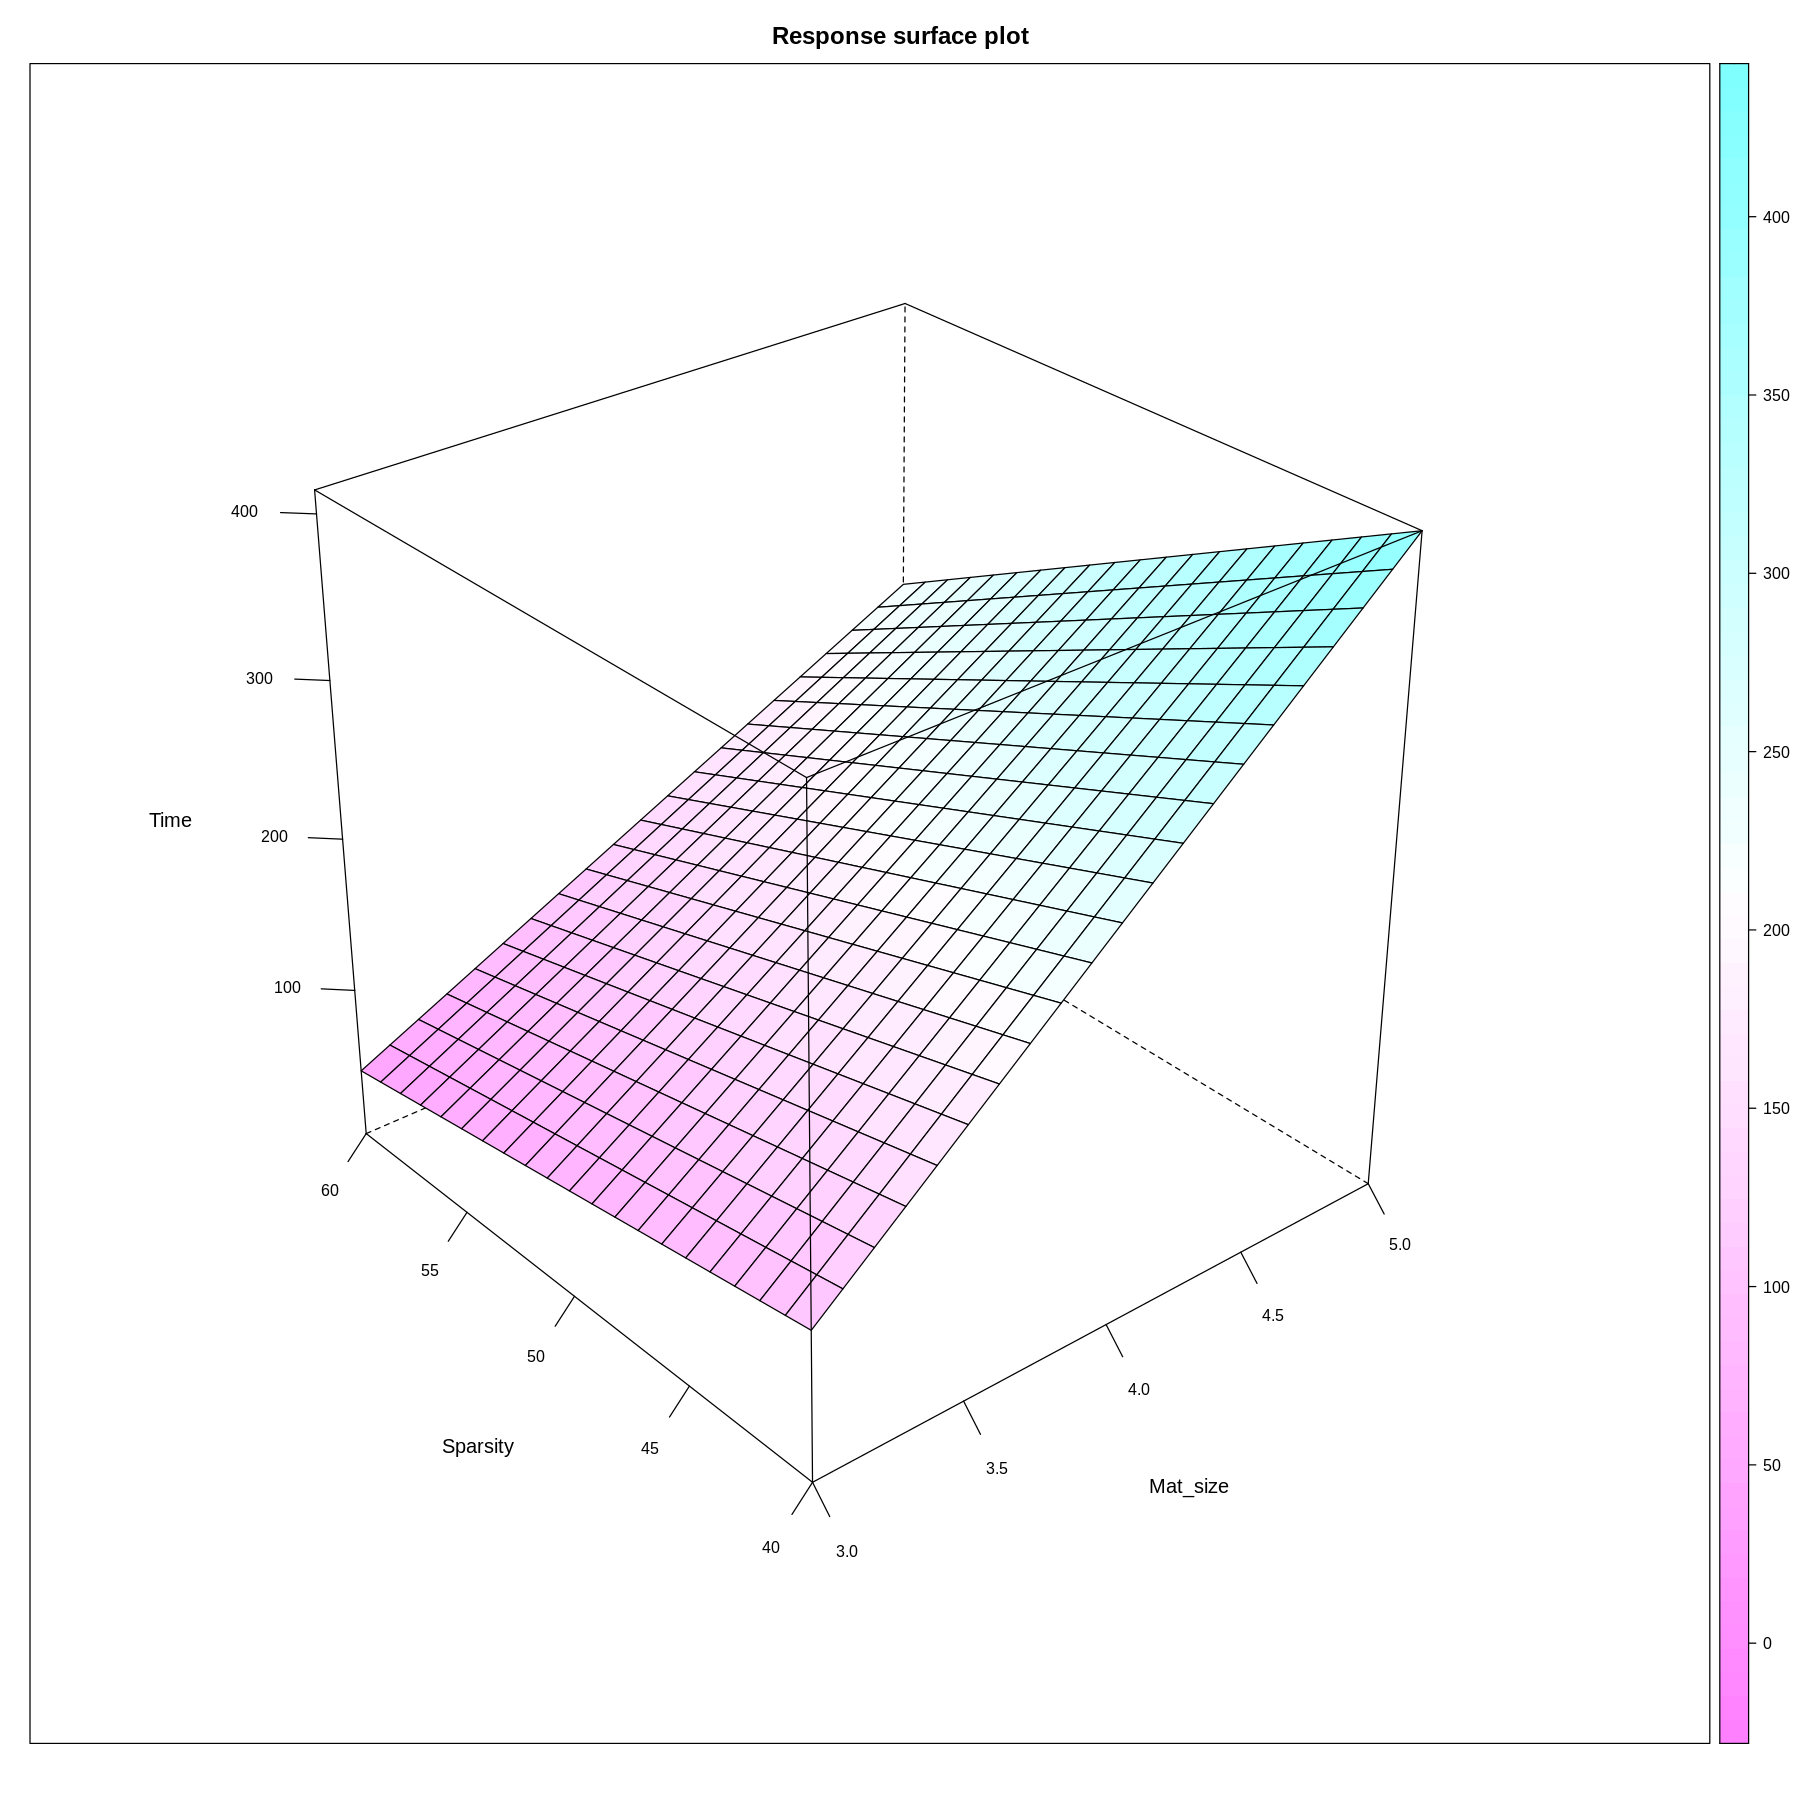

In [74]:
tmp <- data.frame(A_num=seq(3,5,by=0.1), B_num=seq(40,60,by=1), E_num=seq(20,40,by=1))
new_data <- expand.grid(tmp)

new_data$fit_time <- predict(time_lm,new_data)

wireframe(fit_time ~ A_num* B_num, data = new_data ,scales=list(arrows=FALSE), drape=TRUE, perspective=TRUE, xlab="Mat_size", ylab="Sparsity", zlab="Time", main="Response surface plot")


We can see that influence of sparsity on computational time is much higher for 5x5 matrices than for 3x3 matrices.

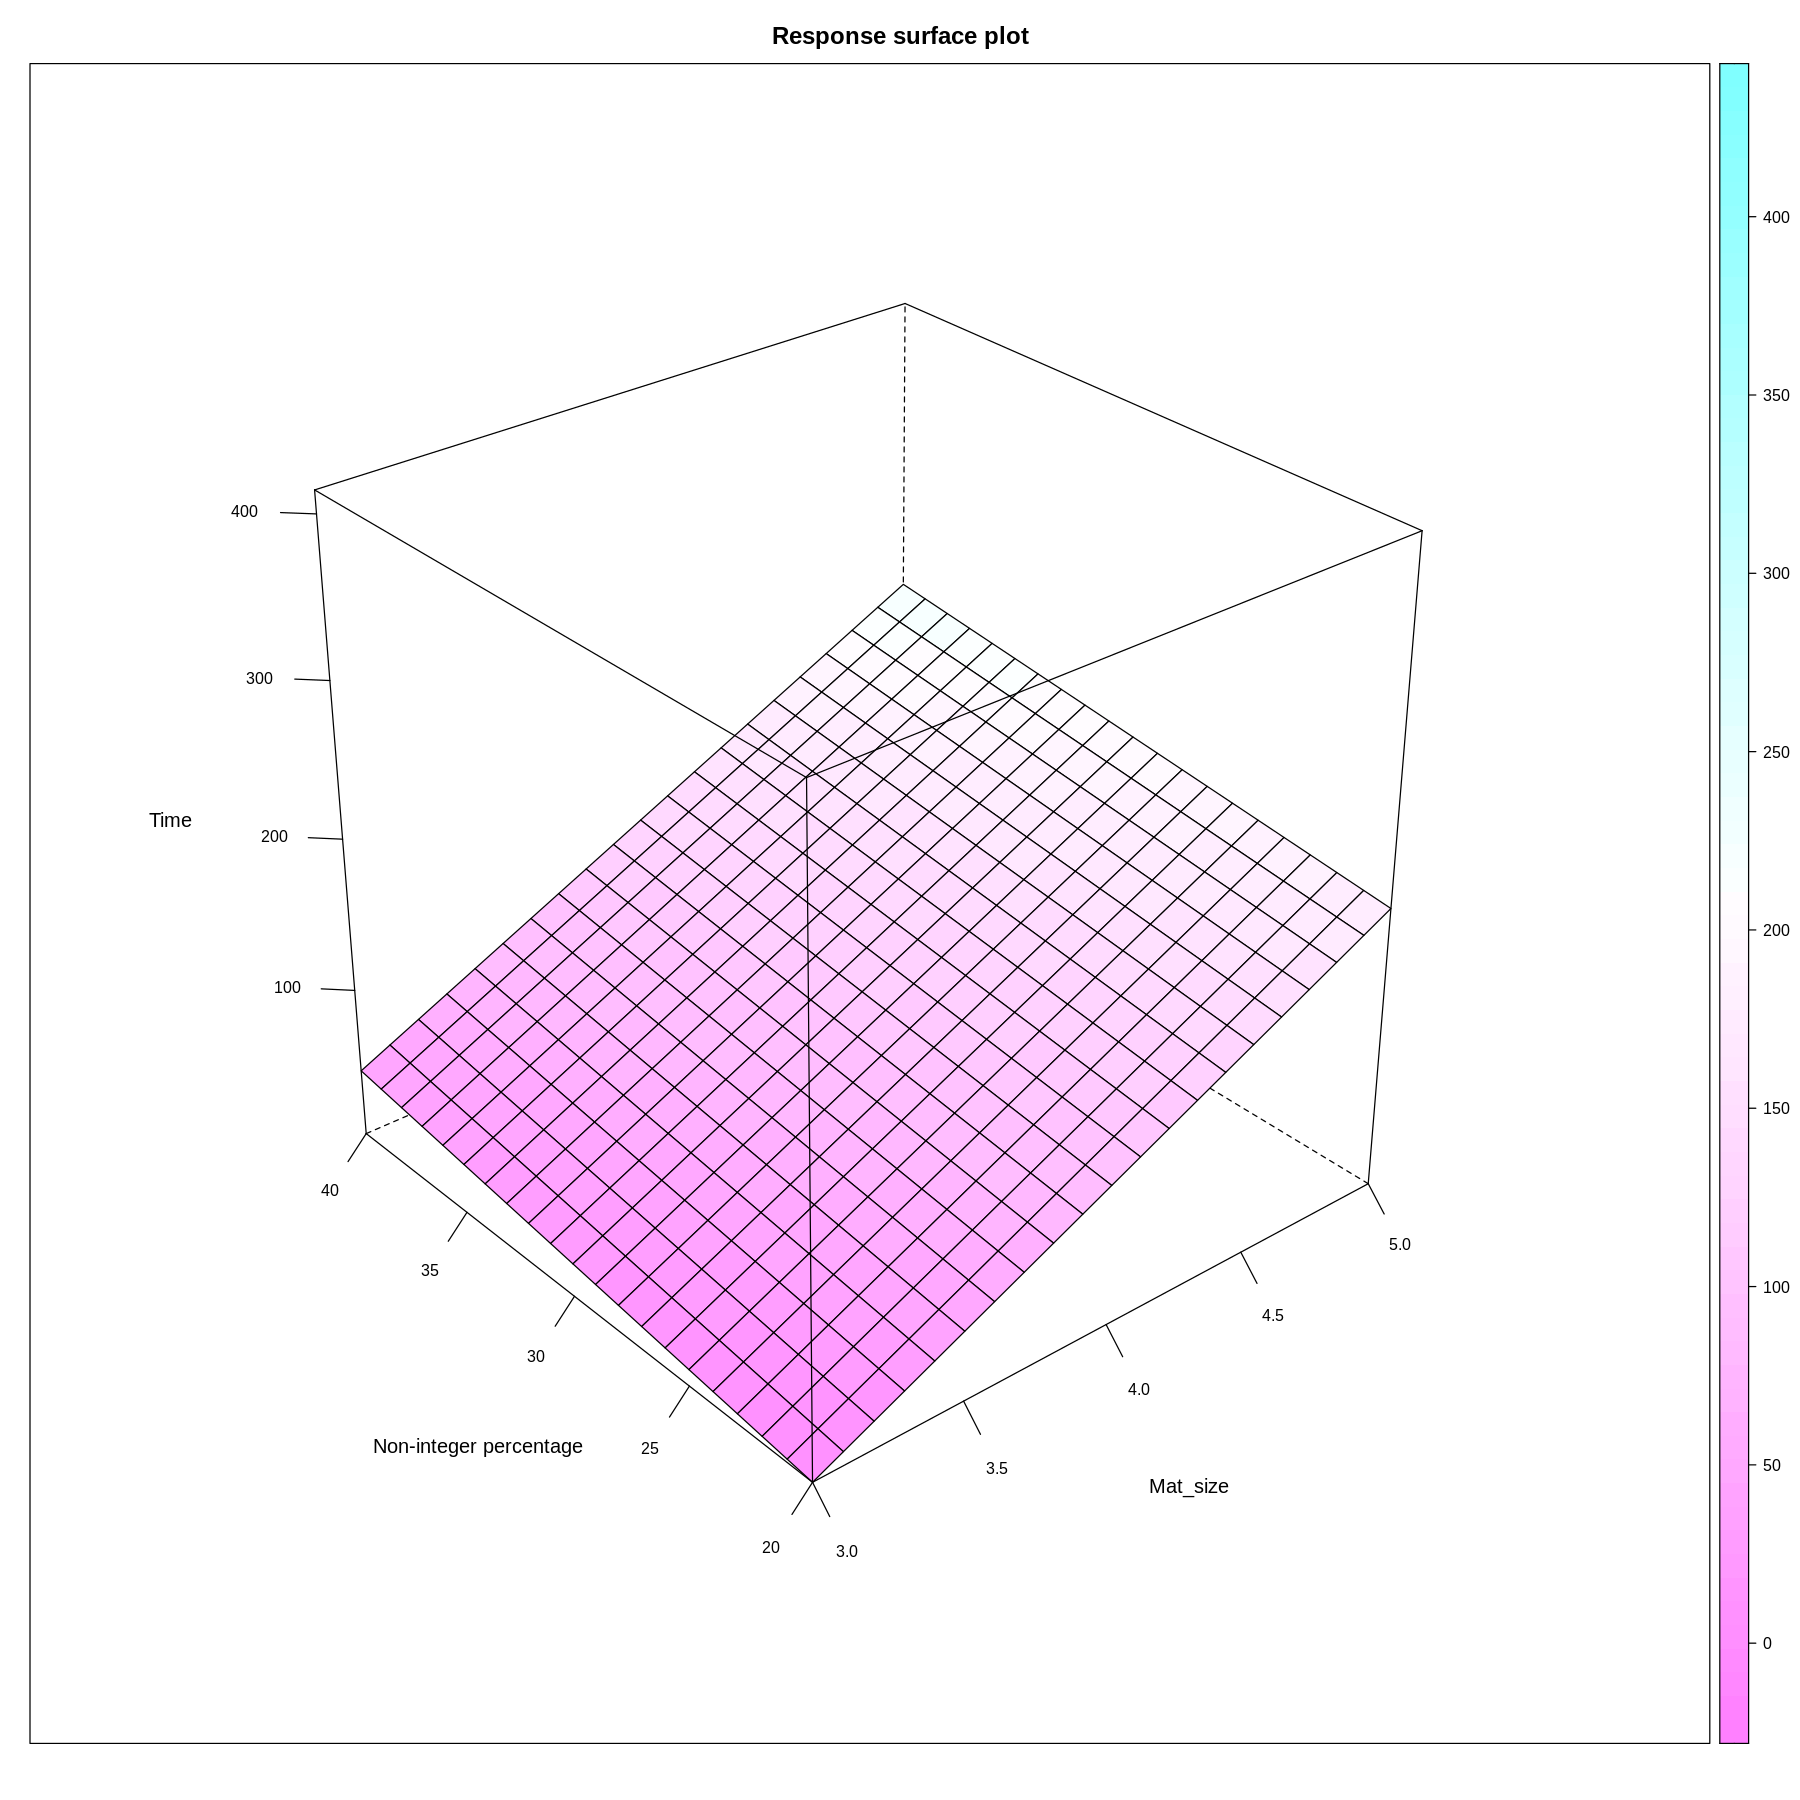

In [75]:
wireframe(fit_time ~ A_num* E_num, data = new_data ,scales=list(arrows=FALSE), drape=TRUE, perspective=TRUE, xlab="Mat_size", ylab="Non-integer percentage", zlab="Time", main="Response surface plot")


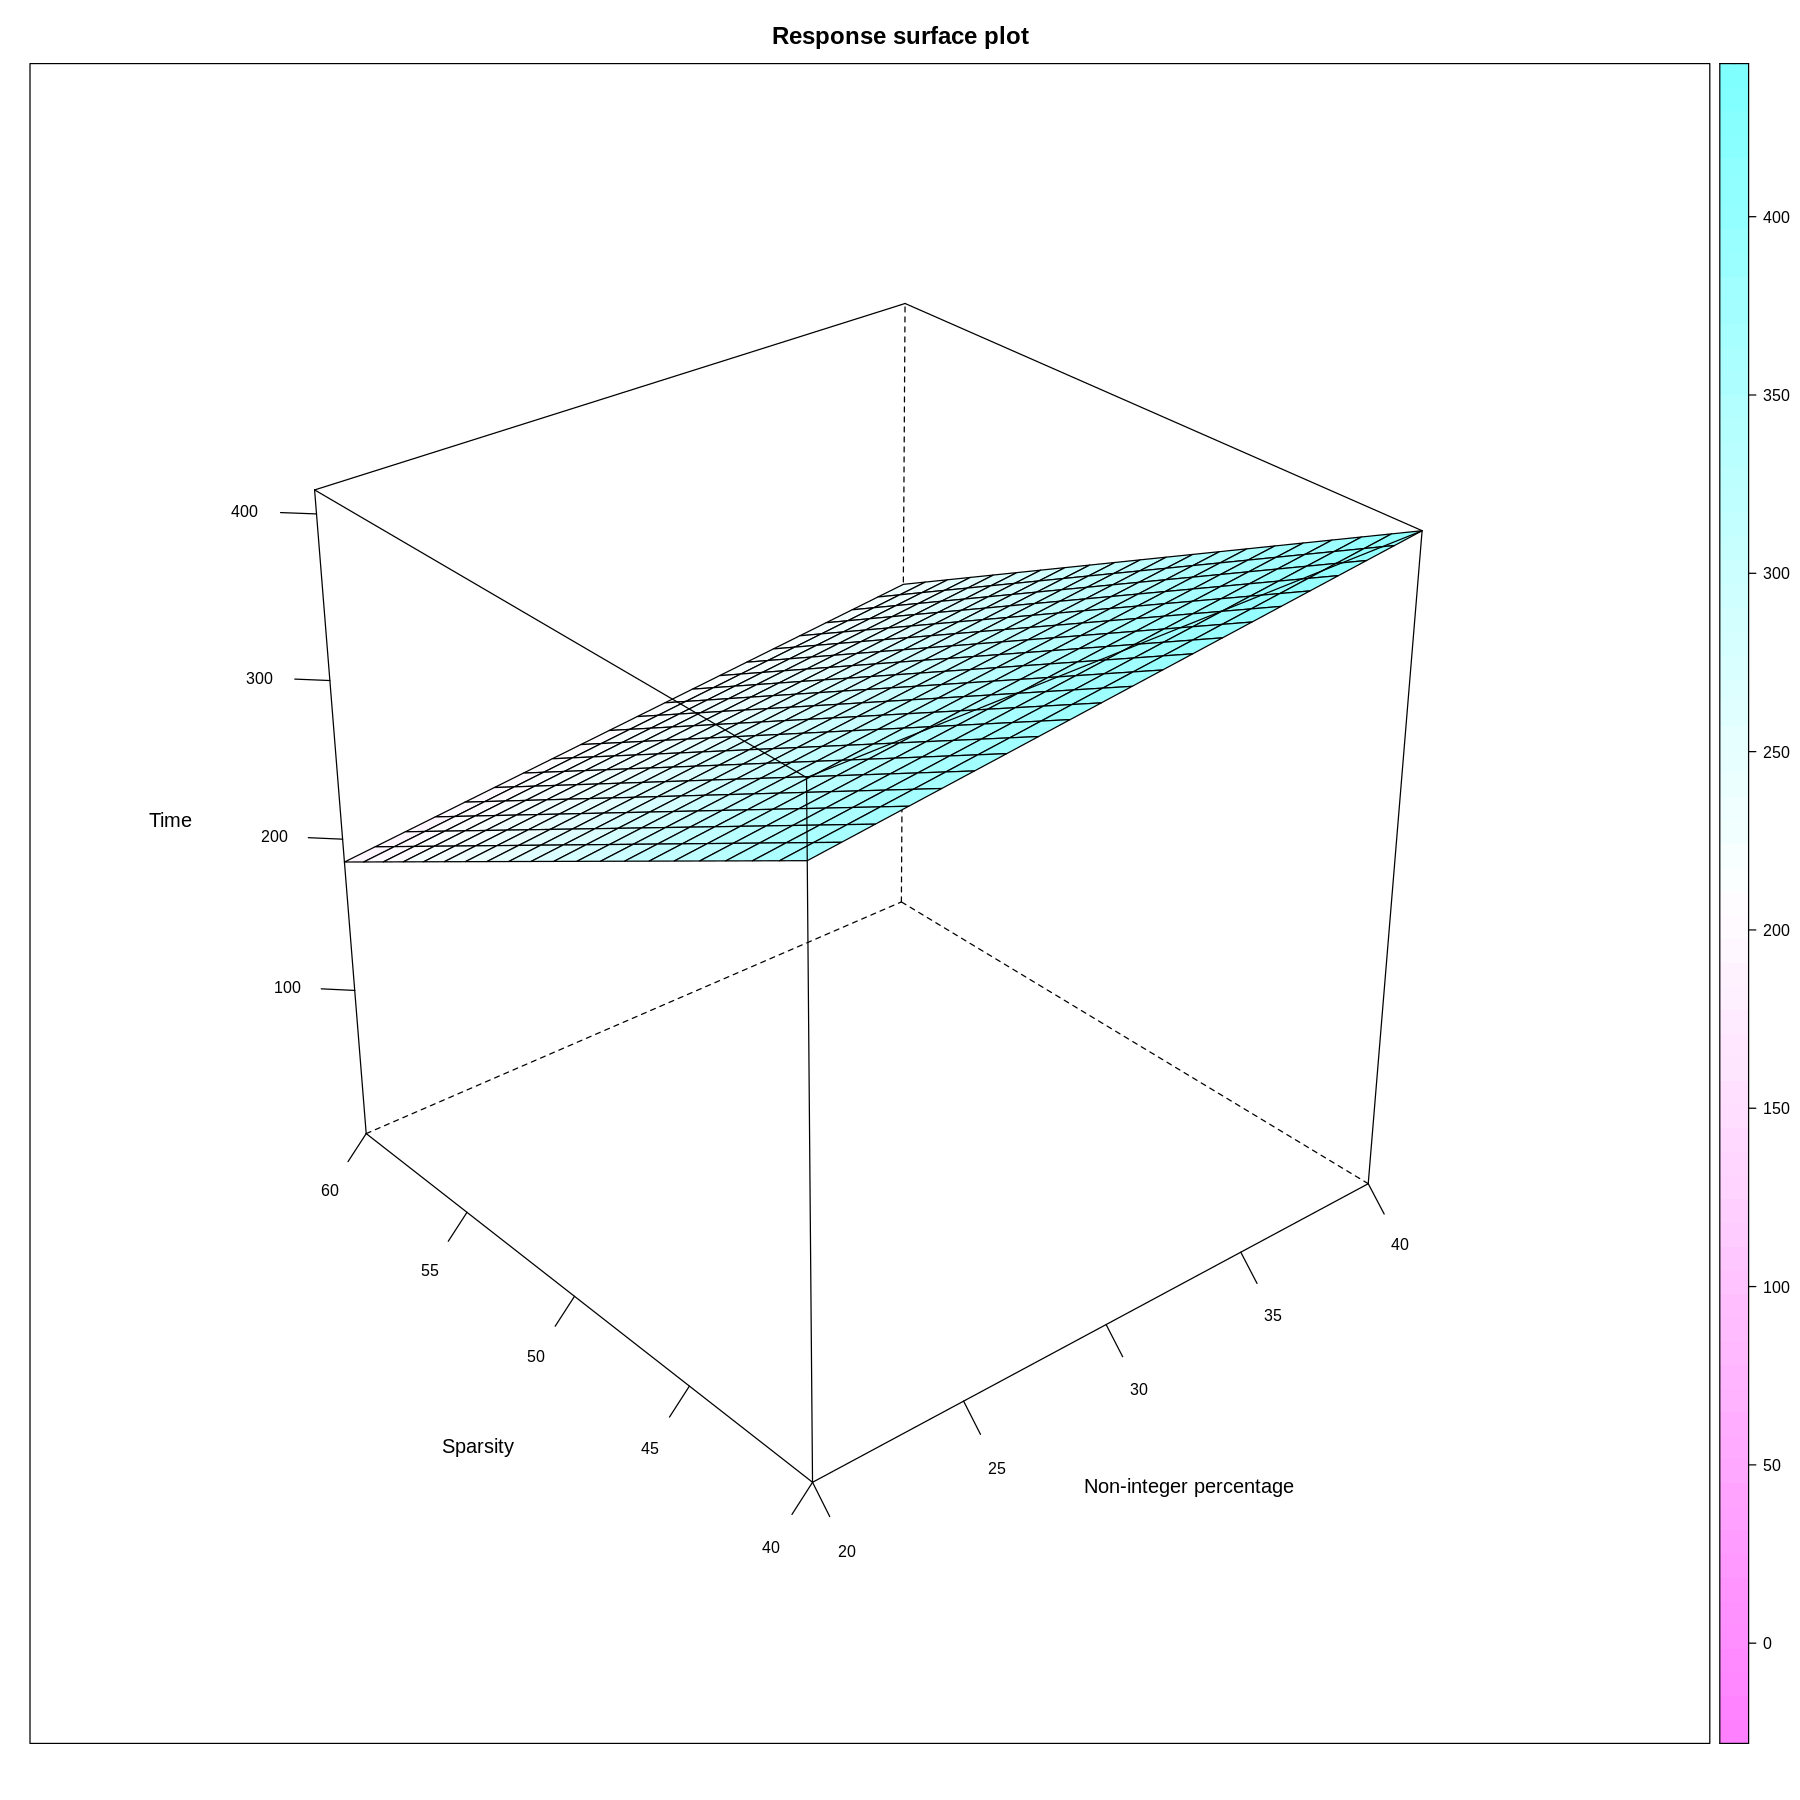

In [76]:
wireframe(fit_time ~ E_num* B_num, data = new_data ,scales=list(arrows=FALSE), drape=TRUE, perspective=TRUE, xlab="Non-integer percentage", ylab="Sparsity", zlab="Time", main="Response surface plot")


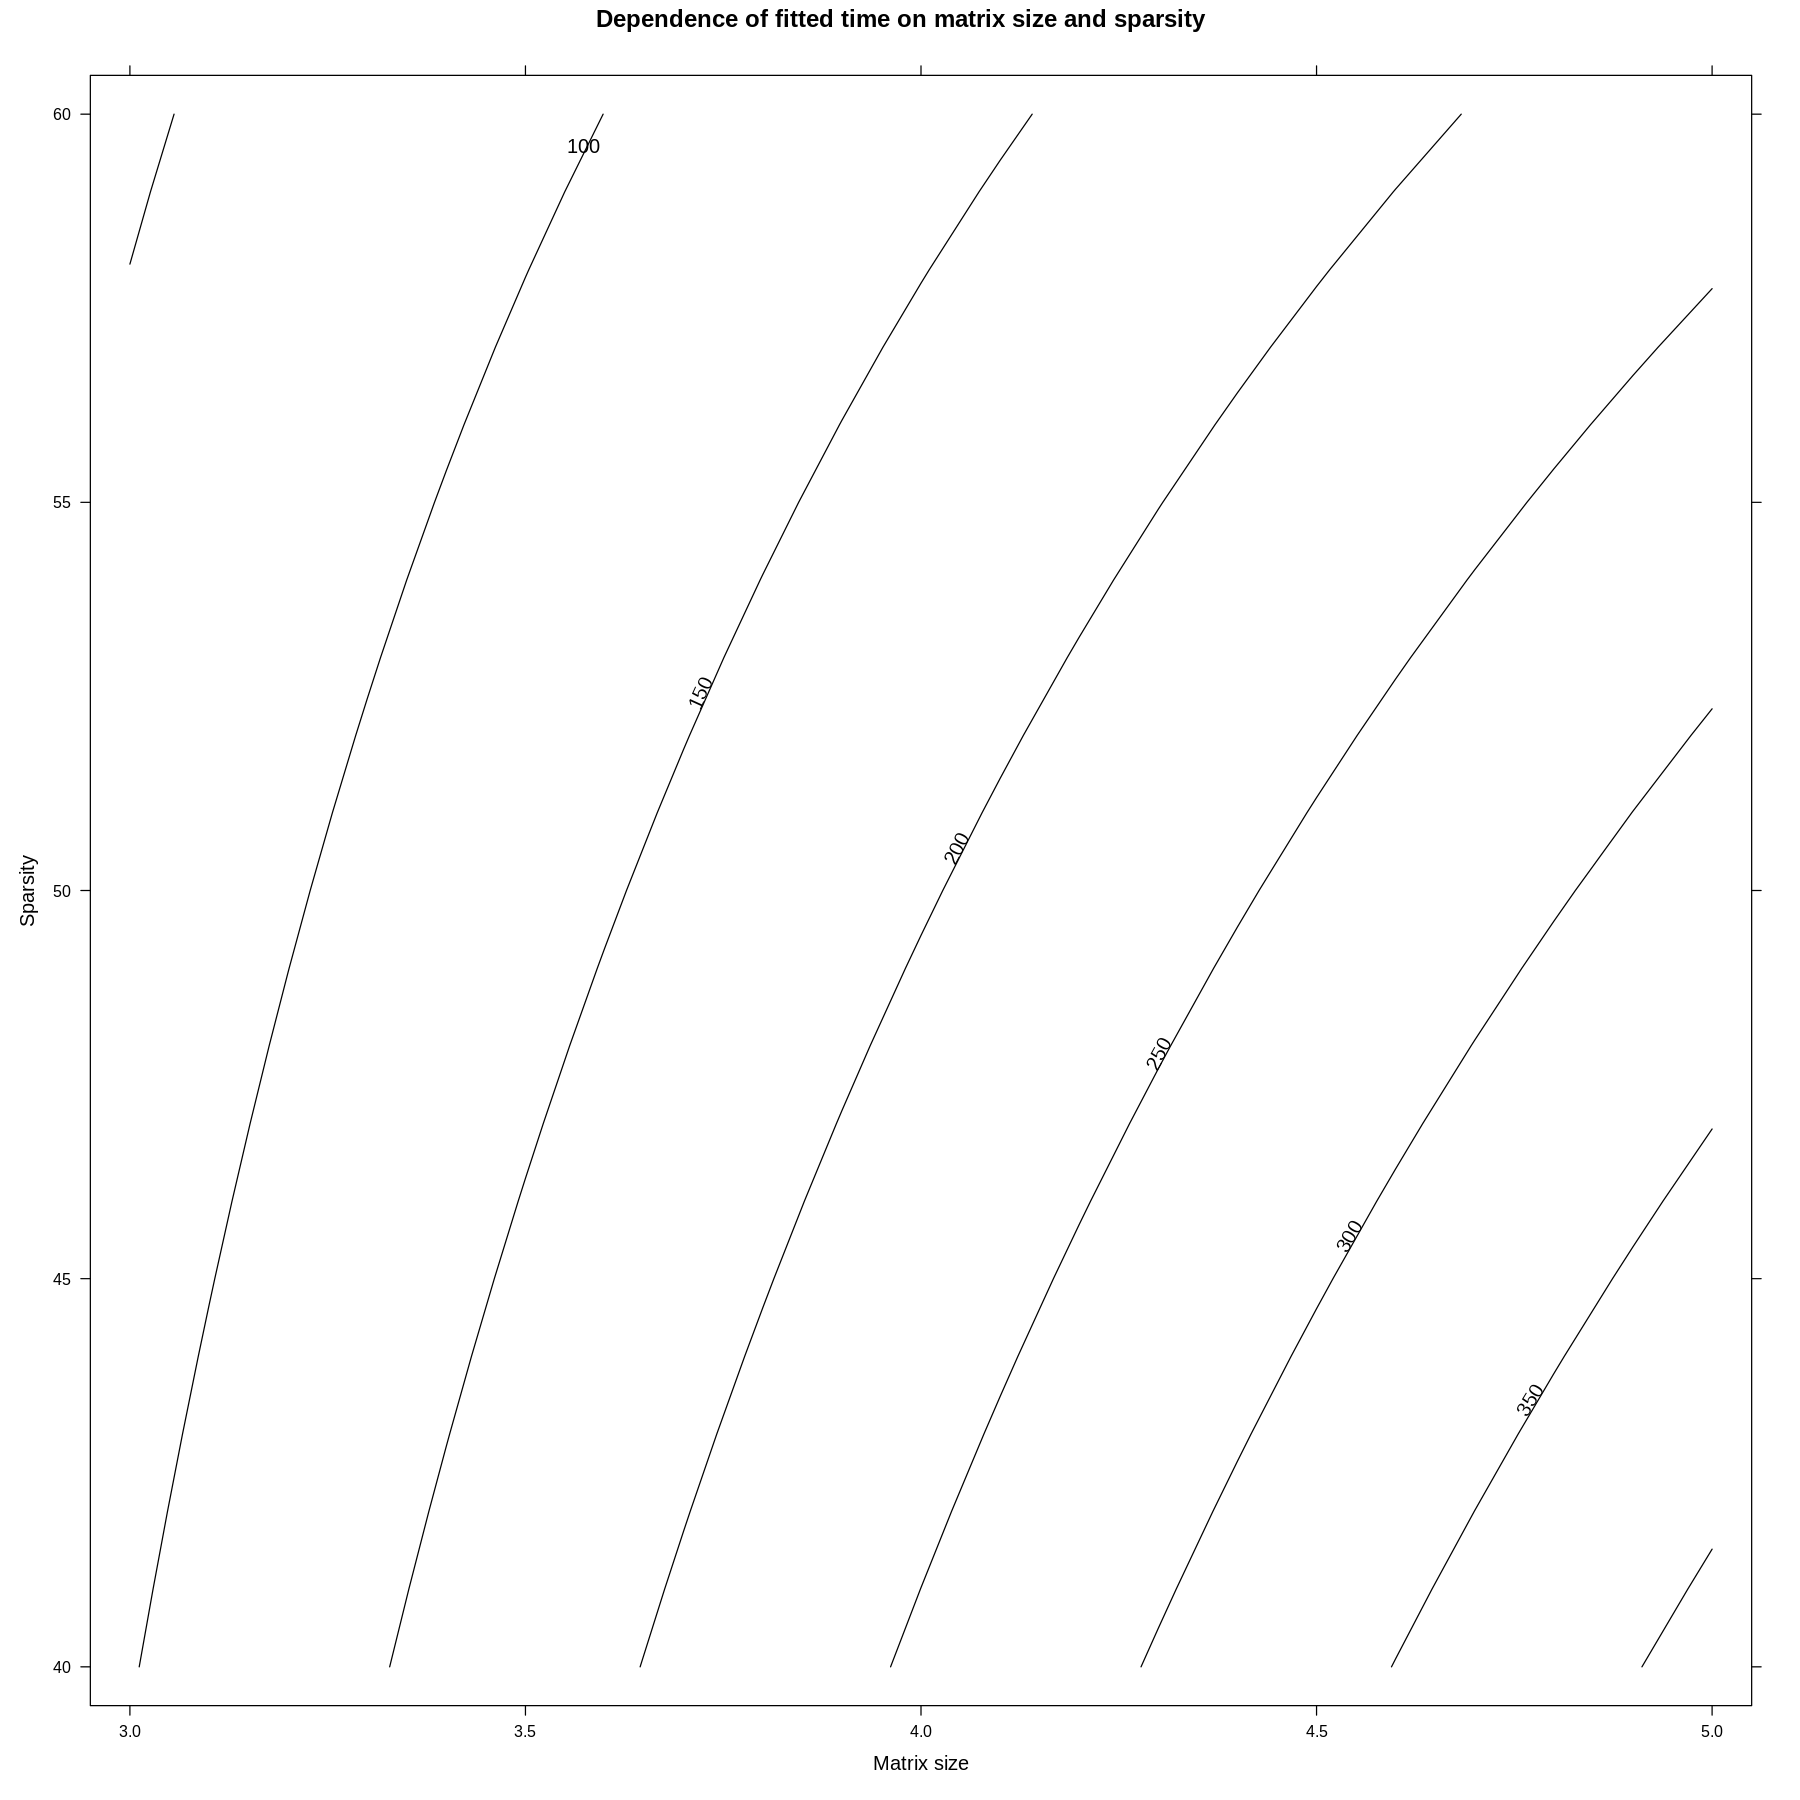

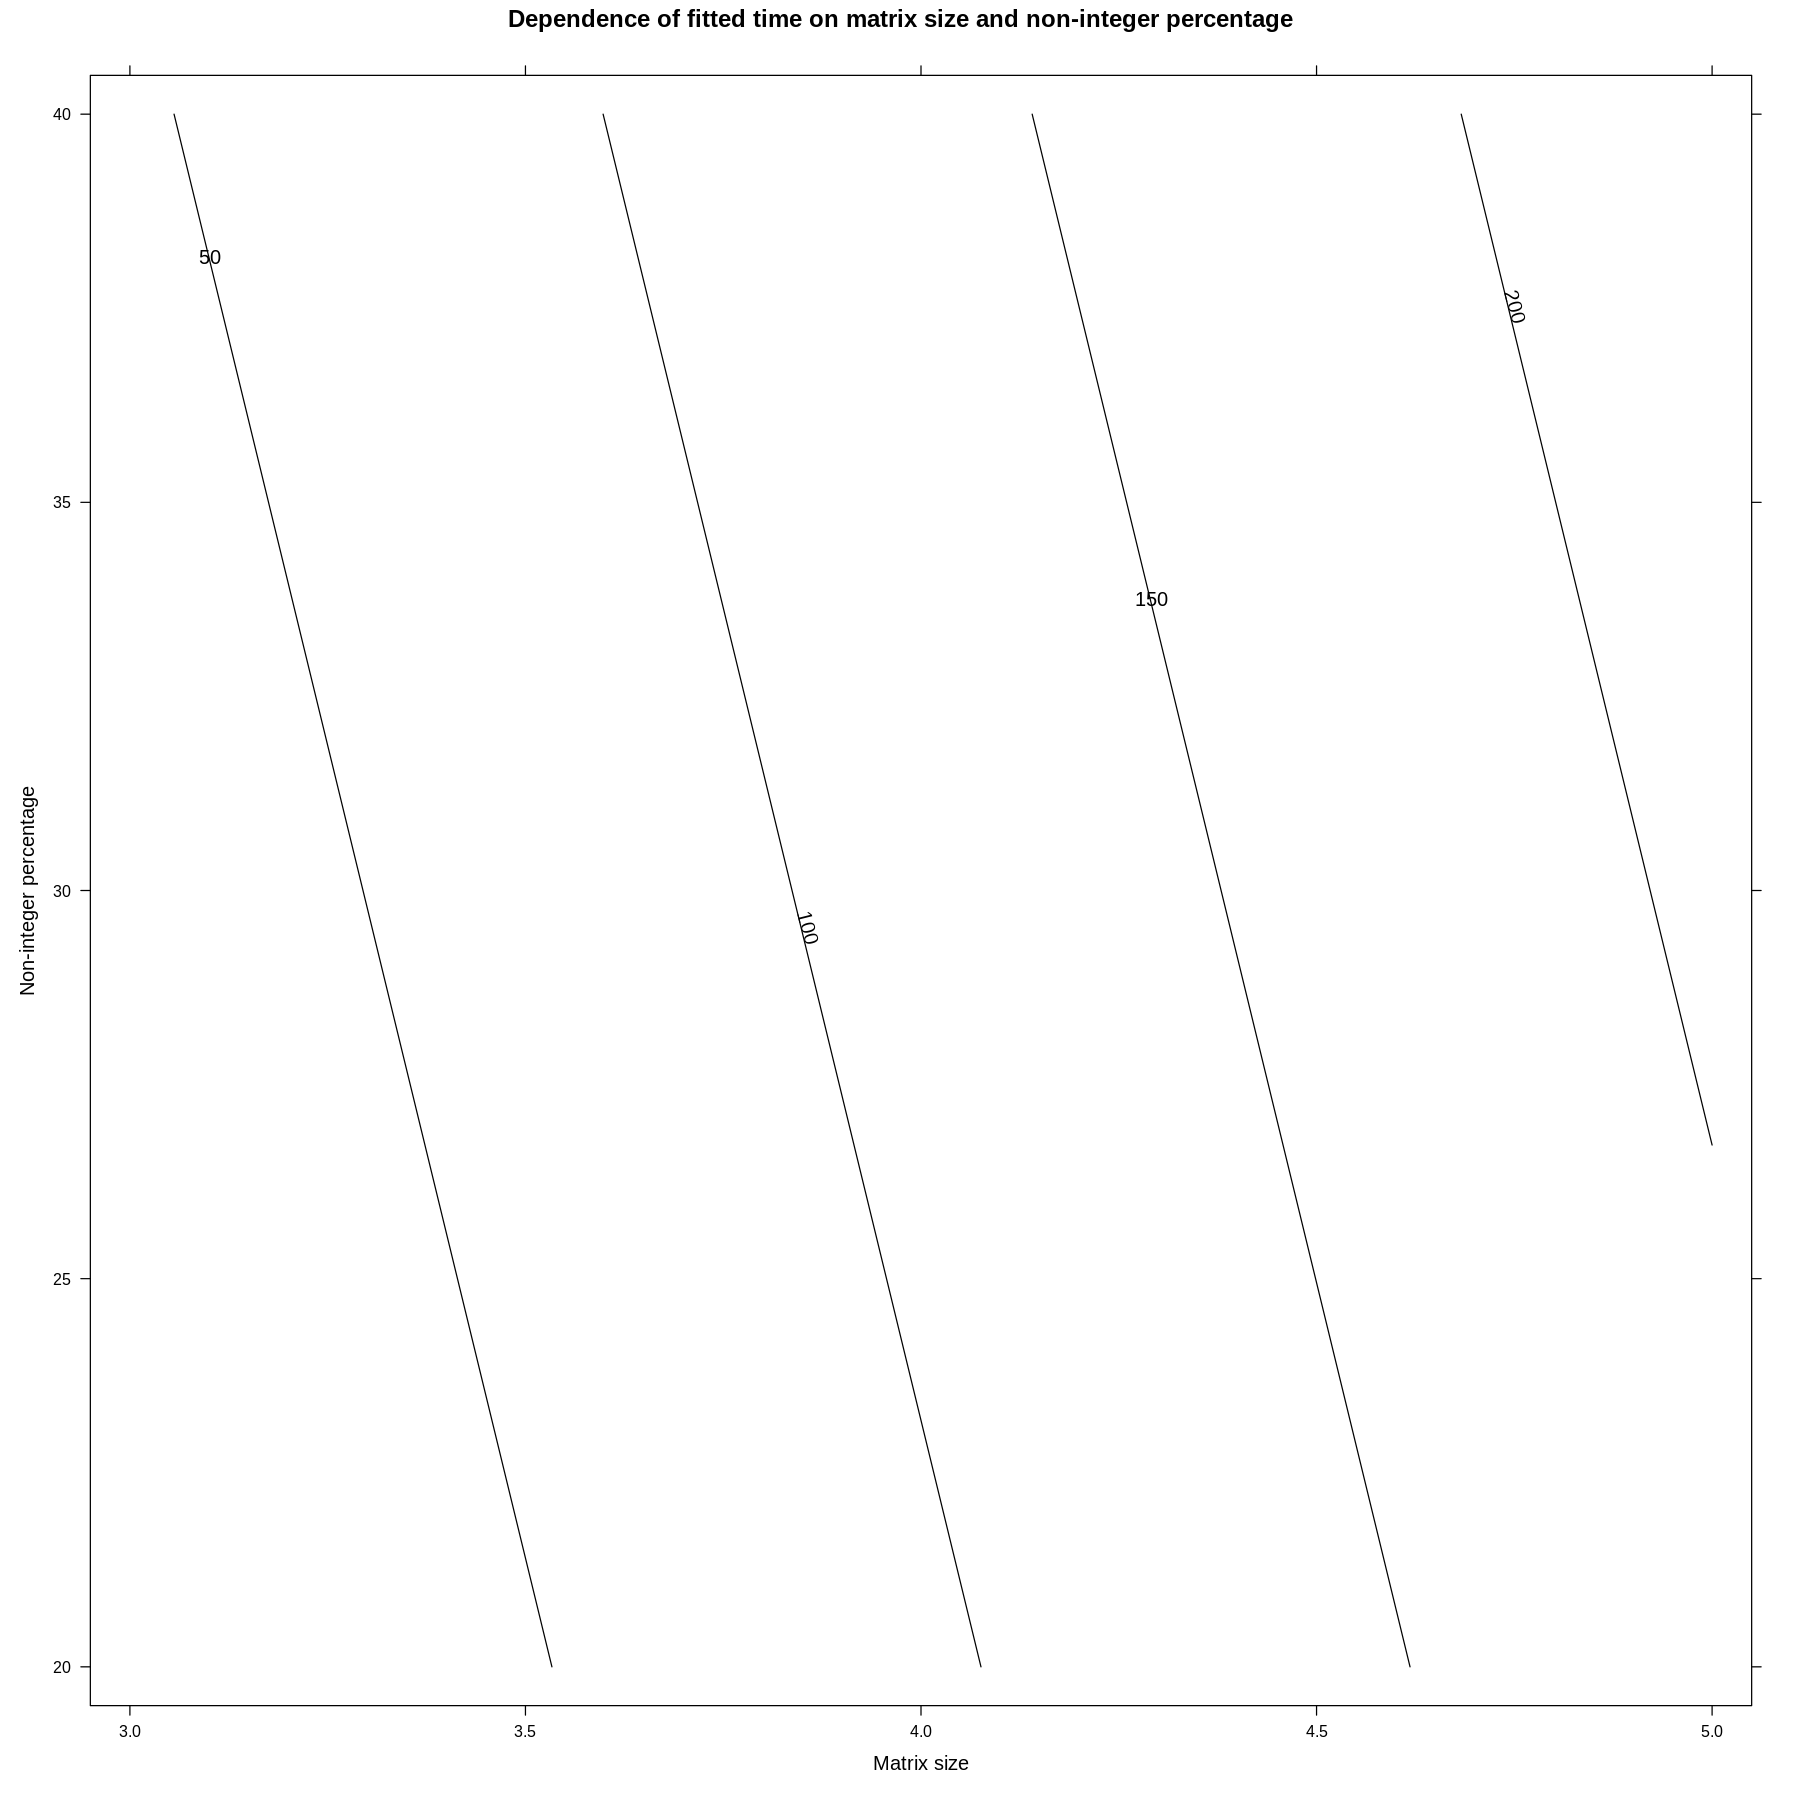

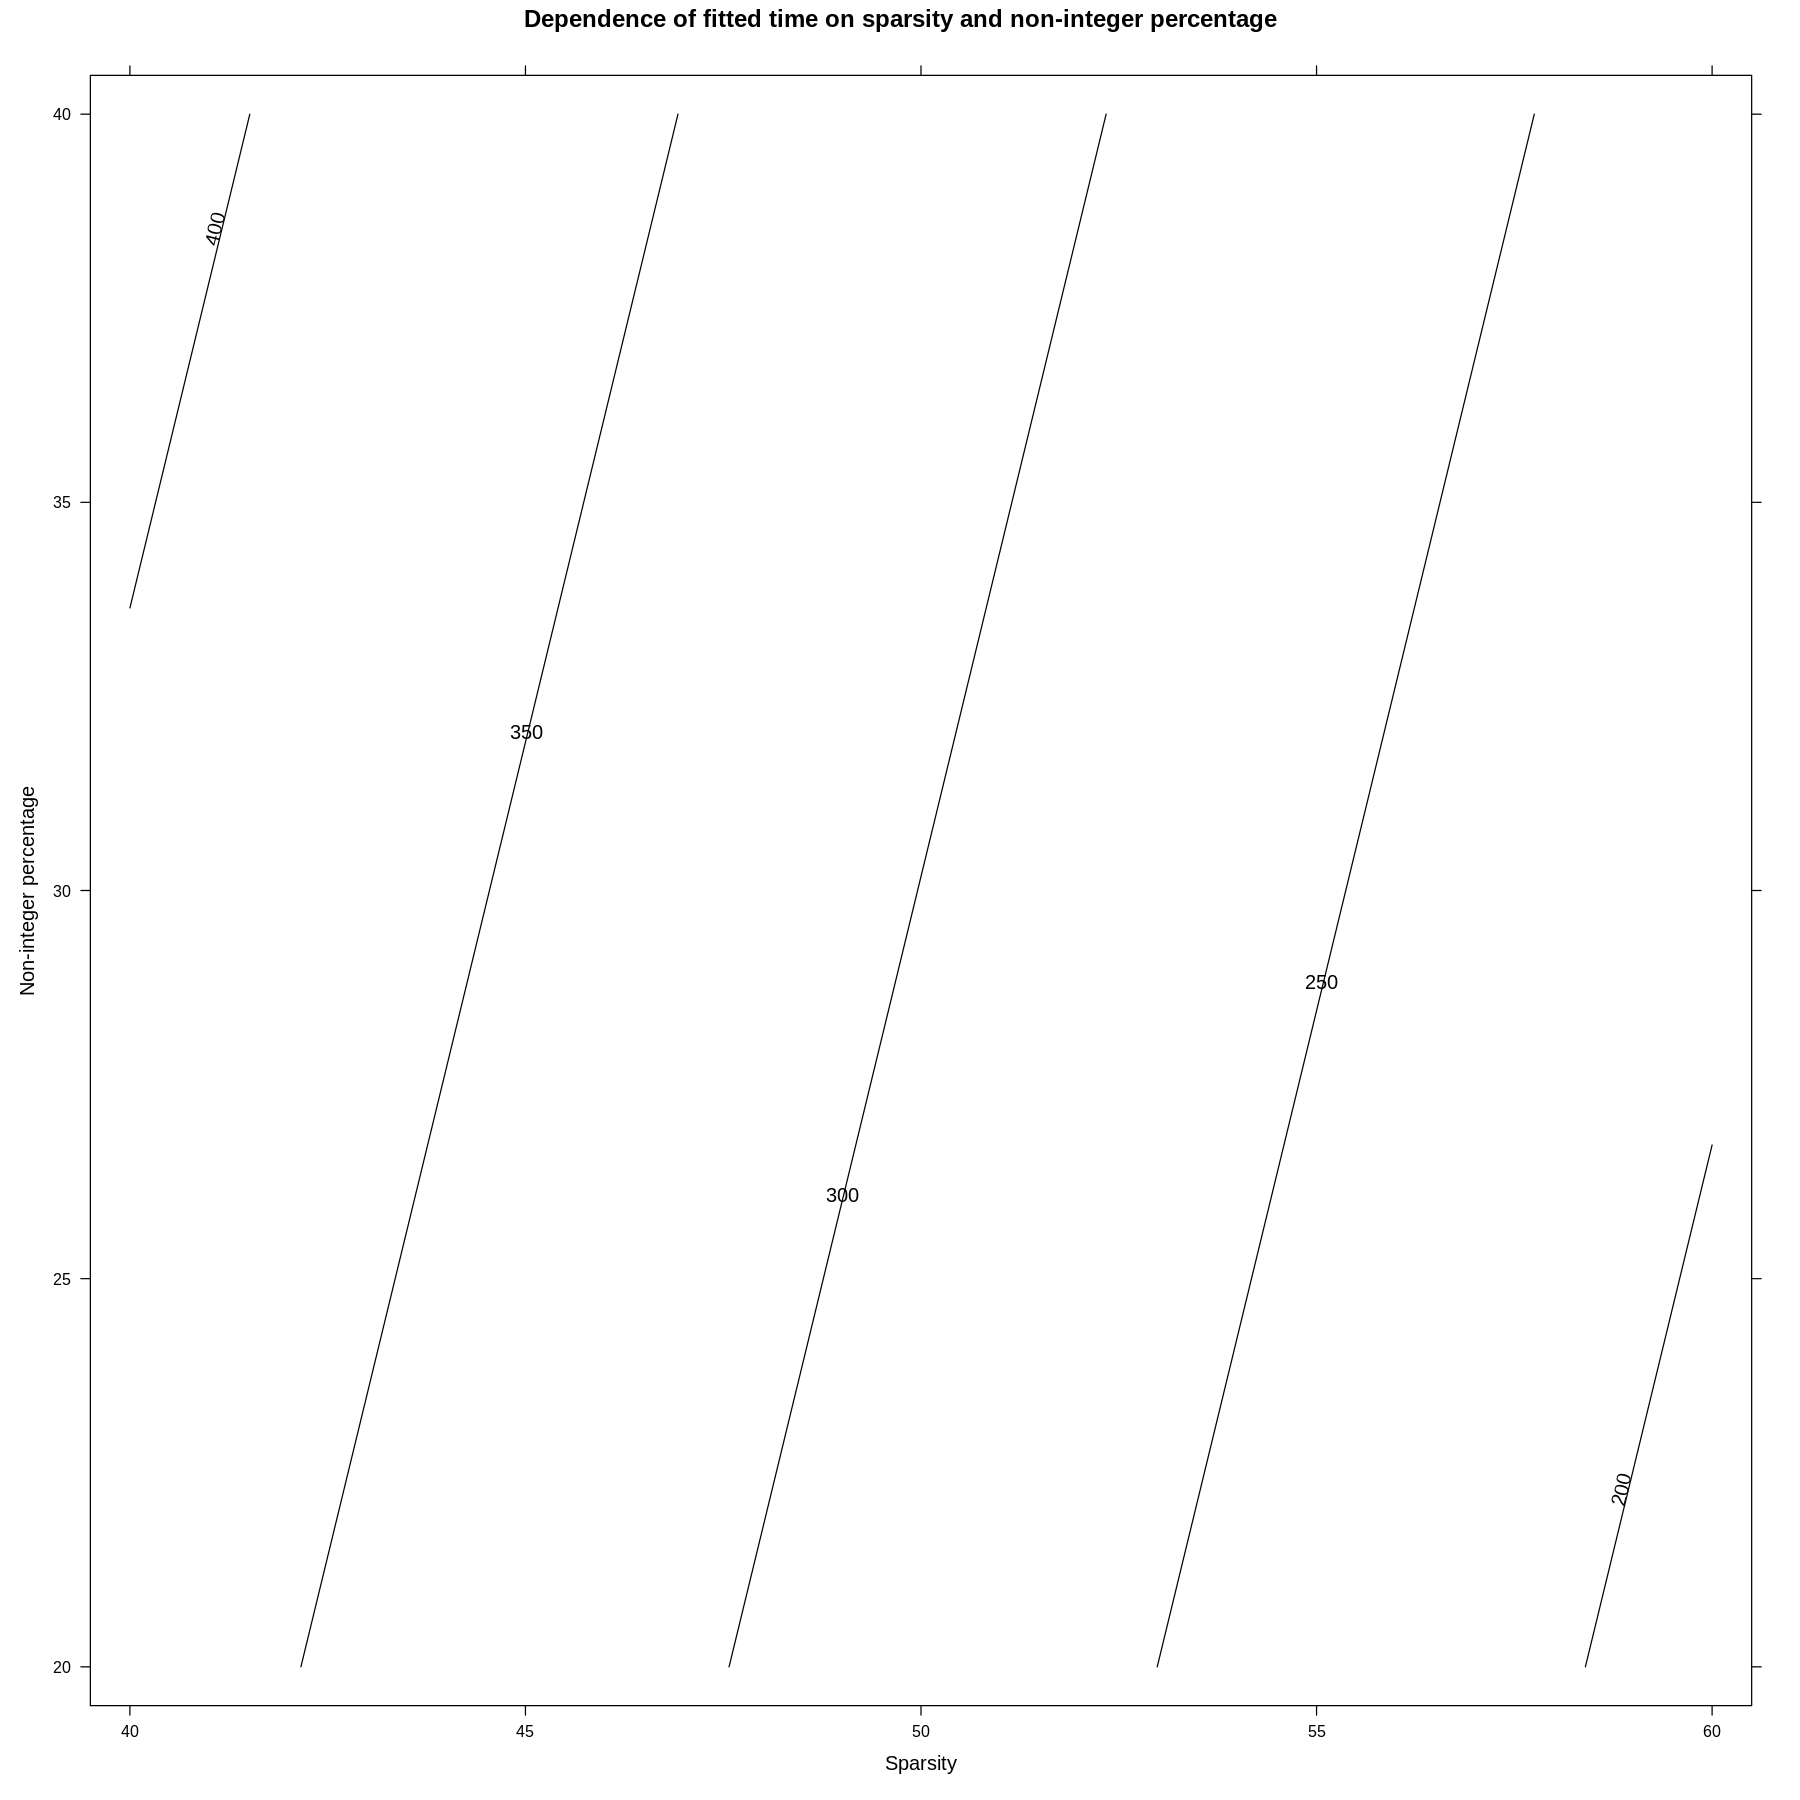

In [77]:
par(mfrow = c(1,3))

contourplot(fit_time ~ A_num* B_num, data = new_data, xlab="Matrix size", ylab="Sparsity" ,main="Dependence of fitted time on matrix size and sparsity")
contourplot(fit_time~ A_num* E_num, data=new_data, xlab="Matrix size", ylab="Non-integer percentage", main="Dependence of fitted time on matrix size and non-integer percentage")
contourplot(fit_time~ B_num* E_num, data=new_data, xlab="Sparsity", ylab="Non-integer percentage", main="Dependence of fitted time on sparsity and non-integer percentage")